#### Install Required Libraries


In [ ]:
# !pip install gseapy==1.0.6
!pip install mofapy2
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
# !pip install --no-cache-dir gseapy

# # !pip install kmeans
# # !pip install silhouette_score
# # !pip install umap-learn
# !pip install mofapy2


# # !pip install gseapy
# # !pip install gseapy bioservices pandas
# # !pip install gprofiler-official
# # !pip install mummichog pandas numpy

# # !pip install git+https://github.com/shuzhao-li/mummichog.git
# !pip install gseapy==1.0.6


### ===========Import Libraries============

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.mixture import GaussianMixture

import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
# from tensorflow.keras import layers, models
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import torch
# from mummichog import PathwayAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# from tensorflow import keras
# from tensorflow.keras import layers
le = LabelEncoder()
from sklearn.decomposition import PCA
# from mofapy2.run.entry_point import entry_point
# import gseapy as gp
# from bioservices import KEGG
from sklearn.preprocessing import StandardScaler
import shap
# from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
# import keras_tuner as kt
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances

In [2]:
# load Dataset and Inspect
df = pd.read_csv("/content/drive/MyDrive/MY THESIS/Thesis/multi_omics_Data.csv")

In [3]:
# INspect Dataset
df.head()


,i,indentity,AMP,Pyruvate,Acetyl-CoA,Glutamate,2OG,Oxaloacetate,Glycine,Succinate,...,M_162,M_163,M_164,M_165,M_166,M_167,M_168,M_169,M_170,M_171
0,0.0,AU565_AAACCAGTTTGG,-0.010239,0.000631,-0.000042,-0.005516,0.008809,0.013755,-0.012962,0.009903,...,0.018209,2.710149e-07,0.003712,0.006100,0.019097,0.006360,0.000233,0.000004,0.012460,0.000164
1,1.0,AU565_AAACGTGCAGCG,-0.012007,0.003525,-0.024046,0.002816,0.047261,0.007665,-0.024386,0.037714,...,0.018629,4.339963e-07,0.003619,0.002290,0.025268,0.013540,0.000482,0.002558,0.012460,0.000163
2,2.0,AU565_AAAGCCACATGC,-0.003727,0.012940,0.002271,0.001271,0.009750,0.004987,-0.013087,0.029924,...,0.017078,2.710149e-07,0.003786,0.003164,0.012625,0.011122,0.000040,0.092450,0.013023,0.000163
3,3.0,AU565_AAAGTCGGCTGG,-0.008337,0.003148,0.003621,-0.002131,0.012203,0.016008,-0.013417,0.025335,...,0.016643,4.339963e-07,0.003729,0.005720,0.008954,0.010175,0.000057,0.001893,0.012460,0.000163
4,4.0,AU565_AAAGTGCCTAAA,-0.008580,-0.022309,-0.005764,0.011526,0.013700,0.006834,-0.013482,0.054048,...,0.020276,2.710149e-07,0.003629,0.003326,0.019097,0.005717,0.000038,0.000009,0.013023,0.000164


In [4]:
df.describe()

,i,AMP,Pyruvate,Acetyl-CoA,Glutamate,2OG,Oxaloacetate,Glycine,Succinate,UDP-N-acetylglucosamine,...,M_162,M_163,M_164,M_165,M_166,M_167,M_168,M_169,M_170,M_171
count,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,...,35276.000000,3.527600e+04,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,3.527600e+04,35276.000000,35276.000000
mean,17637.500000,-0.012558,0.001924,0.007376,0.002085,0.010805,0.010293,-0.009640,0.016647,-0.005012,...,0.016134,1.007146e-04,0.002278,0.007658,0.008424,0.015493,0.003894,2.865211e-03,0.013115,0.000090
std,10183.448385,0.019367,0.017608,0.030329,0.013082,0.009008,0.015340,0.012947,0.017187,0.010663,...,0.009410,1.133715e-03,0.001785,0.010702,0.009779,0.016719,0.013359,1.573252e-02,0.010060,0.000868
min,0.000000,-0.353642,-0.269620,-0.233043,-0.182313,-0.164419,-0.112135,-0.271683,-0.208431,-0.237602,...,0.005209,2.910383e-11,-0.000017,-0.000696,-0.000005,-0.001142,-0.002290,-4.222229e-03,0.001875,0.000007
25%,8818.750000,-0.020635,-0.003273,-0.008208,-0.001670,0.006967,0.000605,-0.012468,0.008164,-0.005482,...,0.012002,2.570450e-07,0.001698,0.002045,0.004457,0.005354,0.000011,-5.916227e-07,0.007198,0.000050
50%,17637.500000,-0.007631,0.001413,0.004622,0.000041,0.008231,0.003455,-0.010564,0.015150,-0.002589,...,0.013206,5.681068e-07,0.002071,0.003767,0.005800,0.009011,0.000063,1.164153e-09,0.011521,0.000070
75%,26456.250000,-0.000684,0.005256,0.020500,0.002796,0.011320,0.014623,-0.007814,0.023830,-0.000424,...,0.016310,2.501532e-06,0.002549,0.008698,0.008352,0.018932,0.001450,3.400911e-05,0.016662,0.000088
max,35275.000000,0.180453,0.235788,0.319097,0.257383,0.234726,0.277436,0.195164,0.212287,0.176858,...,0.182249,9.049392e-02,0.090209,0.169220,0.243853,0.223058,0.388528,3.970387e-01,0.177821,0.095796


In [5]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Identify identity column (assuming it's named 'ID' or similar)
identity_column = ["ID", "i"]  # Update with the actual column name if different

# Drop non-numeric and identity columns
df_fluxomics = df.drop(columns=non_numeric_columns.union(identity_column), errors='ignore')

print("Columns dropped:", list(non_numeric_columns) + identity_column)
print("Remaining numeric columns:", df_fluxomics.columns)

Columns dropped: ['indentity', 'ID', 'i']
Remaining numeric columns: Index(['AMP', 'Pyruvate', 'Acetyl-CoA', 'Glutamate', '2OG', 'Oxaloacetate',
       'Glycine', 'Succinate', 'UDP-N-acetylglucosamine', 'lysine',
       ...
       'M_162', 'M_163', 'M_164', 'M_165', 'M_166', 'M_167', 'M_168', 'M_169',
       'M_170', 'M_171'],
      dtype='object', length=238)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35276 entries, 0 to 35275
Columns: 240 entries, i to M_171
dtypes: float64(239), object(1)
memory usage: 64.6+ MB


In [7]:
# Select metabolite columns (assuming they are in columns 1 to 70)
df_metabolites = df_fluxomics.iloc[:, 0:69]  # Python indexing is zero-based (1st col is index 0)

# Select gene expression columns (assuming they are in columns 71 to 238)
df_genes = df_fluxomics.iloc[:, 70:238]  # Adjust the range based on your dataset structure

In [8]:
# checking for Missing Number
df_metabolites.isnull().sum()

,0
AMP,0
Pyruvate,0
Acetyl-CoA,0
Glutamate,0
2OG,0
...,...
Fatty Acid,0
Pyrimidine,0
(Glc)3 (GlcNAc)2 (Man)9 (Asn)1,0
(GlcNAc)4 (Man)3 (Asn)1,0


### ========Histograms Plot for metabolites ===========

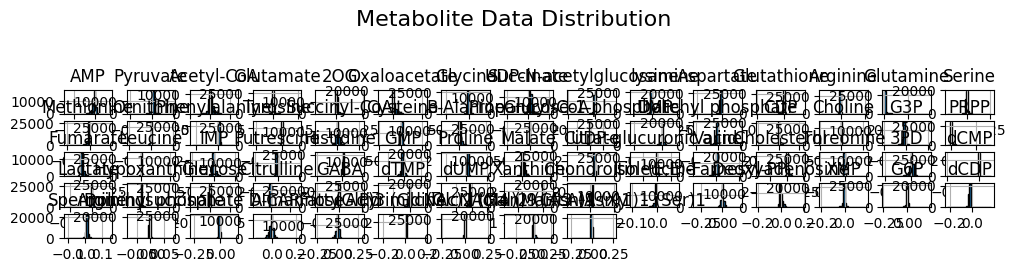

In [9]:
# Plot histograms for metabolites
df_metabolites.hist(figsize=(12, 8), bins=30, layout=(20, 15), edgecolor='black')
plt.suptitle('Metabolite Data Distribution', fontsize=16)
plt.show()


### ========Boxplot for metabolites ===========

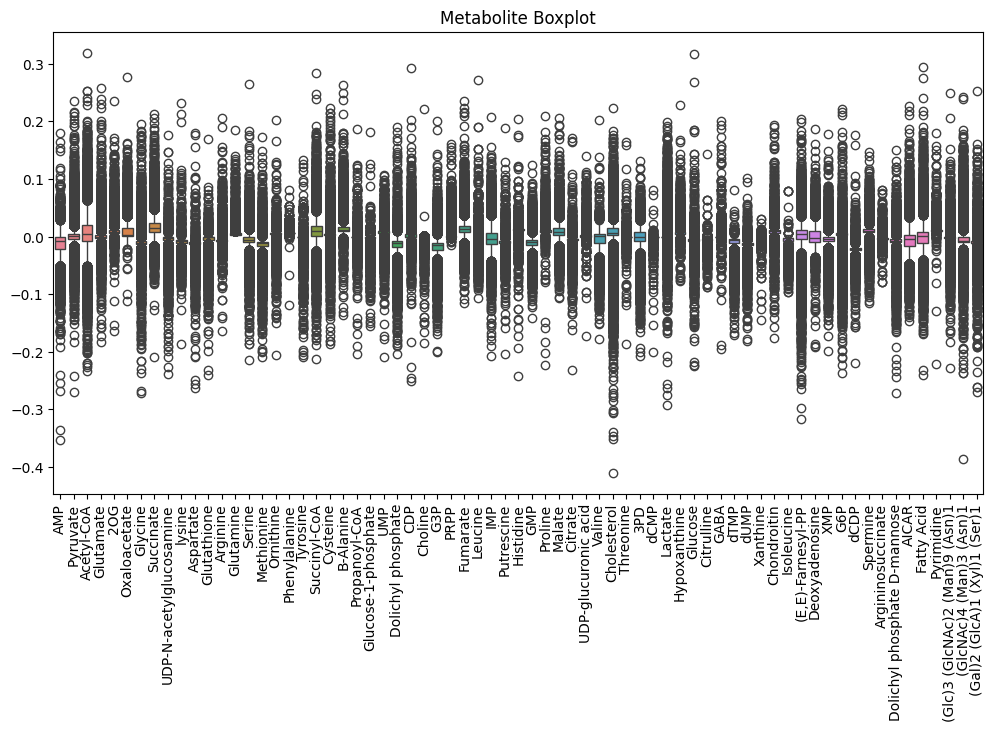

In [10]:
# Boxplot for metabolites
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_metabolites)
plt.xticks(rotation=90)
plt.title("Metabolite Boxplot")
plt.show()


========Correlation matrix ===========

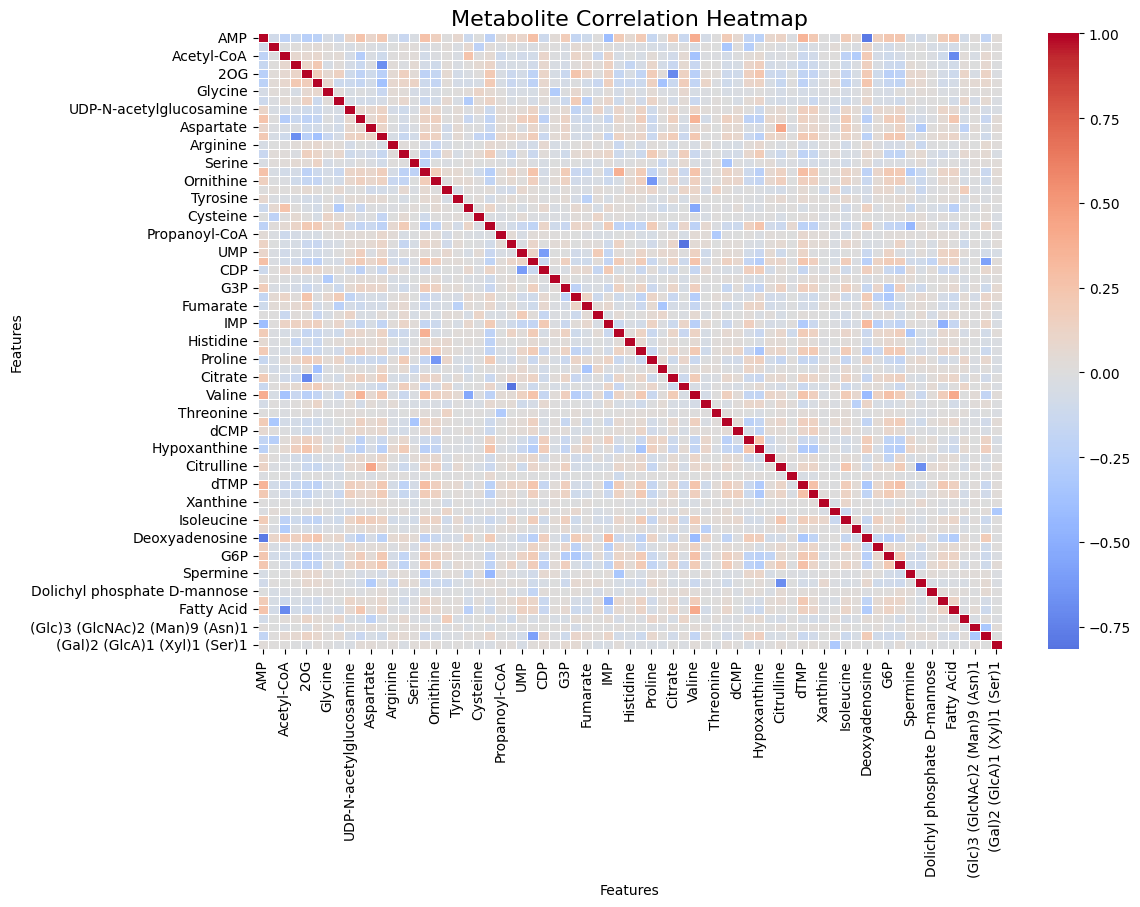

In [11]:

# Compute the correlation matrix between all metabolites and all genes
corr_matrix= df_metabolites.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5, center=0)
plt.title("Metabolite Correlation Heatmap", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

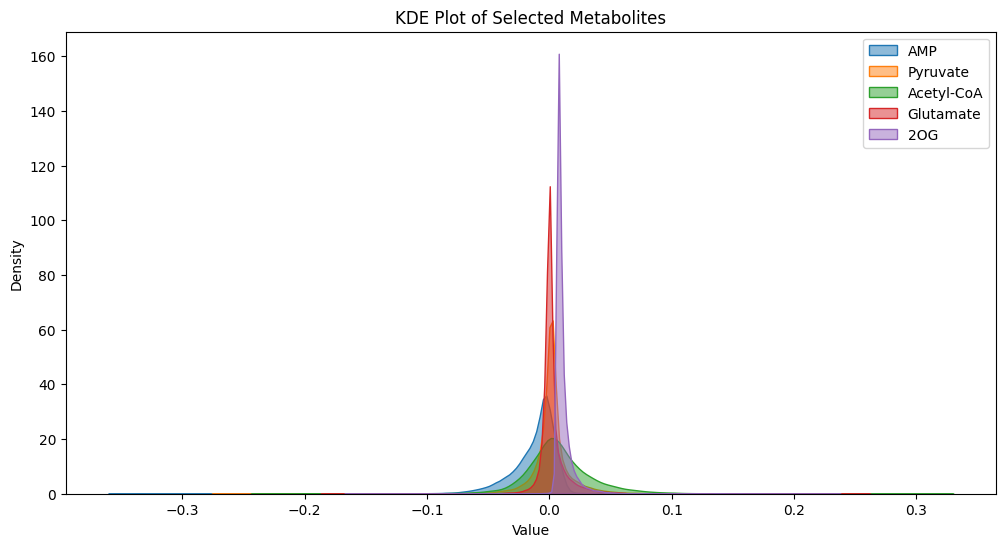

In [12]:
# Select a subset of columns for visualization
selected_columns = df_metabolites.columns[:5]  # Pick a few to avoid overcrowding

plt.figure(figsize=(12, 6))
for col in selected_columns:
    sns.kdeplot(df_metabolites[col], label=col, fill=True, alpha=0.5)

plt.legend()
plt.title("KDE Plot of Selected Metabolites")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-13-d7cbb275e2f6>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=umap_features_2d[:, 0], y=umap_features_2d[:, 1], palette='tab10')


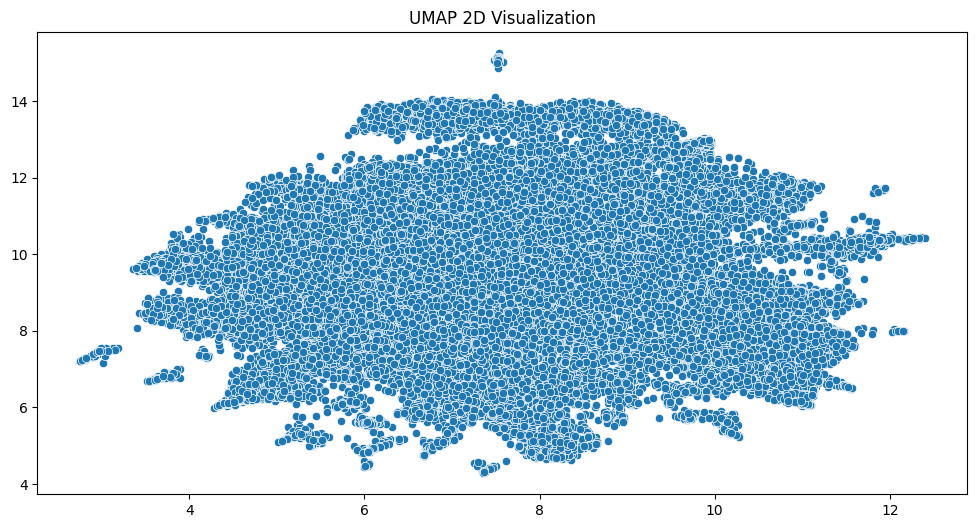

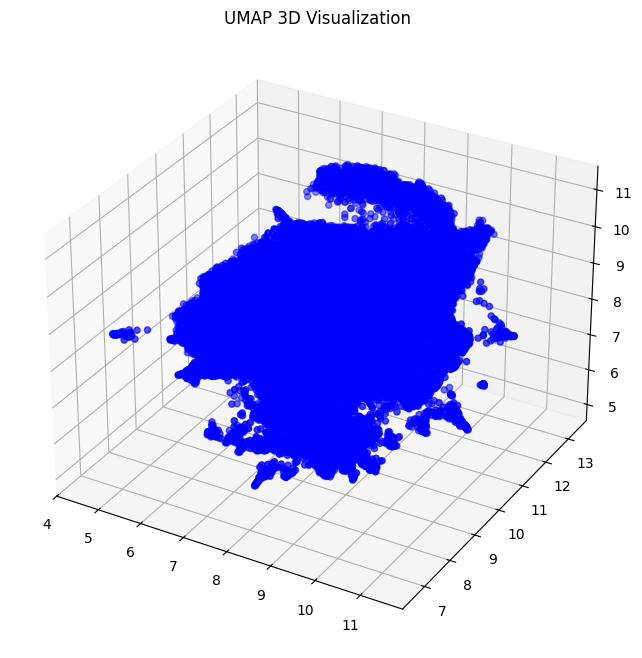

In [13]:
# UMAP with 2 components for visualization
umap_model_2d = umap.UMAP(n_components=2, random_state=42)
umap_features_2d = umap_model_2d.fit_transform(df_metabolites)

# UMAP with 3 components for visualization
umap_model_3d = umap.UMAP(n_components=3, random_state=42)
umap_features_3d = umap_model_3d.fit_transform(df_metabolites)

# 2D Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=umap_features_2d[:, 0], y=umap_features_2d[:, 1], palette='tab10')
plt.title('UMAP 2D Visualization')
plt.show()

# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_features_3d[:, 0], umap_features_3d[:, 1], umap_features_3d[:, 2], c='blue', marker='o')
ax.set_title('UMAP 3D Visualization')
plt.show()


In [14]:
# UMAP with 10 components for deep learning
umap_model_10d = umap.UMAP(n_components=10, random_state=42)
umap_features_10d = umap_model_10d.fit_transform(df_metabolites)

# Print the shape to ensure it's 10-dimensional
print(f"UMAP Features Shape: {umap_features_10d.shape}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP Features Shape: (35276, 10)


### Applyinf clustiering on the U_map_10d and checking for Quality

In [15]:
# Function to apply KMeans and calculate Silhouette and Davies-Bouldin scores
def apply_kmeans_and_check(umap_features_10d, n_clusters_range):
    results = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(umap_features_10d)

        # Calculate Silhouette Score
        silhouette = silhouette_score(umap_features_10d, kmeans_labels)

        # Calculate Davies-Bouldin Score
        davies_bouldin = davies_bouldin_score(umap_features_10d, kmeans_labels)

        results.append({
            'n_clusters': n_clusters,
            'Silhouette Score': silhouette,
            'Davies-Bouldin Score': davies_bouldin
        })

    return pd.DataFrame(results)

# Define a range of clusters for KMeans to test
n_clusters_range = range(2, 11)  # Test from 2 to 10 clusters
kmeans_results = apply_kmeans_and_check(umap_features_10d, n_clusters_range)

# Print the results of varying KMeans clusters
print(kmeans_results)


   n_clusters  Silhouette Score  Davies-Bouldin Score
0           2          0.216041              1.828432
1           3          0.253150              1.400752
2           4          0.283038              1.270515
3           5          0.274515              1.273309
4           6          0.269884              1.405310
5           7          0.243390              1.458448
6           8          0.273846              1.340769
7           9          0.267235              1.339021
8          10          0.251185              1.356669


Given that the Silhouette Score reaches its highest value at K=4 (0.283038) and the Davies-Bouldin Score is lowest at K=4 (1.270515), Thus, K=4 appears to be the optimal choice.

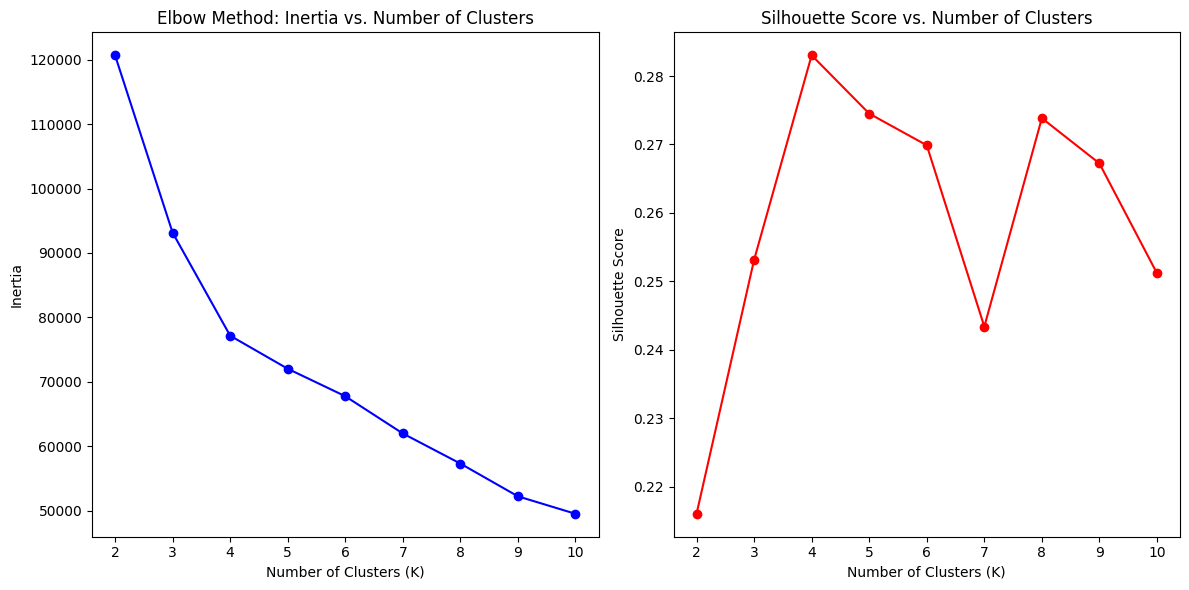

In [16]:
# Define a range of clusters to test
n_clusters_range = range(2, 11)  # Test from 2 to 10 clusters
inertia = []
silhouette_scores = []

# Apply KMeans clustering for different values of K and calculate inertia and silhouette scores
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(umap_features_10d)

    # Inertia for Elbow Method
    inertia.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg = silhouette_score(umap_features_10d, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, inertia, marker='o', color='b')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


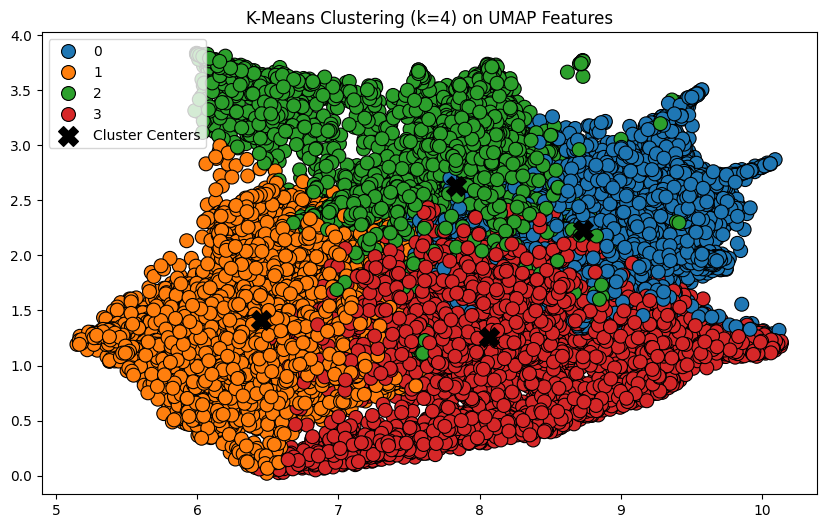

In [17]:
# Fit KMeans with optimal number of clusters
optimal_k = 4  # Example: you can choose the optimal K based on the results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(umap_features_10d)

# Visualize the cluster centers along with the points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_features_10d[:, 0], y=umap_features_10d[:, 1], hue=kmeans_labels, palette='tab10', s=100, edgecolor='k')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Cluster Centers')

plt.title(f'K-Means Clustering (k={optimal_k}) on UMAP Features')
plt.legend()
plt.show()


### Correlation between metabolites and UMAP features to know Top 5 features in each UMAP feature

In [18]:
# Define UMAP features with cluster labels
df_umap_with_labels = pd.DataFrame(umap_features_10d, columns=[f"UMAP{i+1}" for i in range(10)])
df_umap_with_labels['Cluster'] = kmeans_labels  # Adding cluster labels to the DataFrame

# Correlation between metabolites and UMAP features
correlation_matrix = df_metabolites.corrwith(df_umap_with_labels.iloc[:, :-1])  # Exclude 'Cluster' column

# Identify the top metabolites for each UMAP component
top_metabolites_per_umap = {}
for umap_feature in df_umap_with_labels.columns[:-1]:  # Exclude 'Cluster' column
    top_metabolites_per_umap[umap_feature] = df_metabolites.corrwith(df_umap_with_labels[umap_feature]).abs().sort_values(ascending=False).head(5)

# Print top metabolites for each UMAP component
for umap_feature, metabolites in top_metabolites_per_umap.items():
    print(f"Top metabolites for {umap_feature}:")
    print(metabolites)


Top metabolites for UMAP1:
Valine            0.609765
Fatty Acid        0.572939
AMP               0.545886
Acetyl-CoA        0.542244
Deoxyadenosine    0.534473
dtype: float64
Top metabolites for UMAP2:
Oxaloacetate      0.458922
Cholesterol       0.417815
Deoxyadenosine    0.299925
Valine            0.283943
AMP               0.253094
dtype: float64
Top metabolites for UMAP3:
IMP           0.262581
Fatty Acid    0.245826
Serine        0.243529
Acetyl-CoA    0.242377
Valine        0.206525
dtype: float64
Top metabolites for UMAP4:
Fatty Acid       0.353070
Acetyl-CoA       0.322311
Valine           0.308493
Phenylalanine    0.208232
Succinyl-CoA     0.205231
dtype: float64
Top metabolites for UMAP5:
Phenylalanine    0.307000
Chondroitin      0.216769
Acetyl-CoA       0.180266
3PD              0.176353
Isoleucine       0.171606
dtype: float64
Top metabolites for UMAP6:
Acetyl-CoA             0.264133
Oxaloacetate           0.233782
GMP                    0.233598
UDP-glucuronic acid   

<ipython-input-19-562a194f8f3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metabolites.values, y=metabolites.index, ax=axes[i], palette='viridis')
<ipython-input-19-562a194f8f3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metabolites.values, y=metabolites.index, ax=axes[i], palette='viridis')
<ipython-input-19-562a194f8f3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metabolites.values, y=metabolites.index, ax=axes[i], palette='viridis')
<ipython-input-19-562a194f8f3b>:6: FutureWarning: 

Passing `palette` without assi

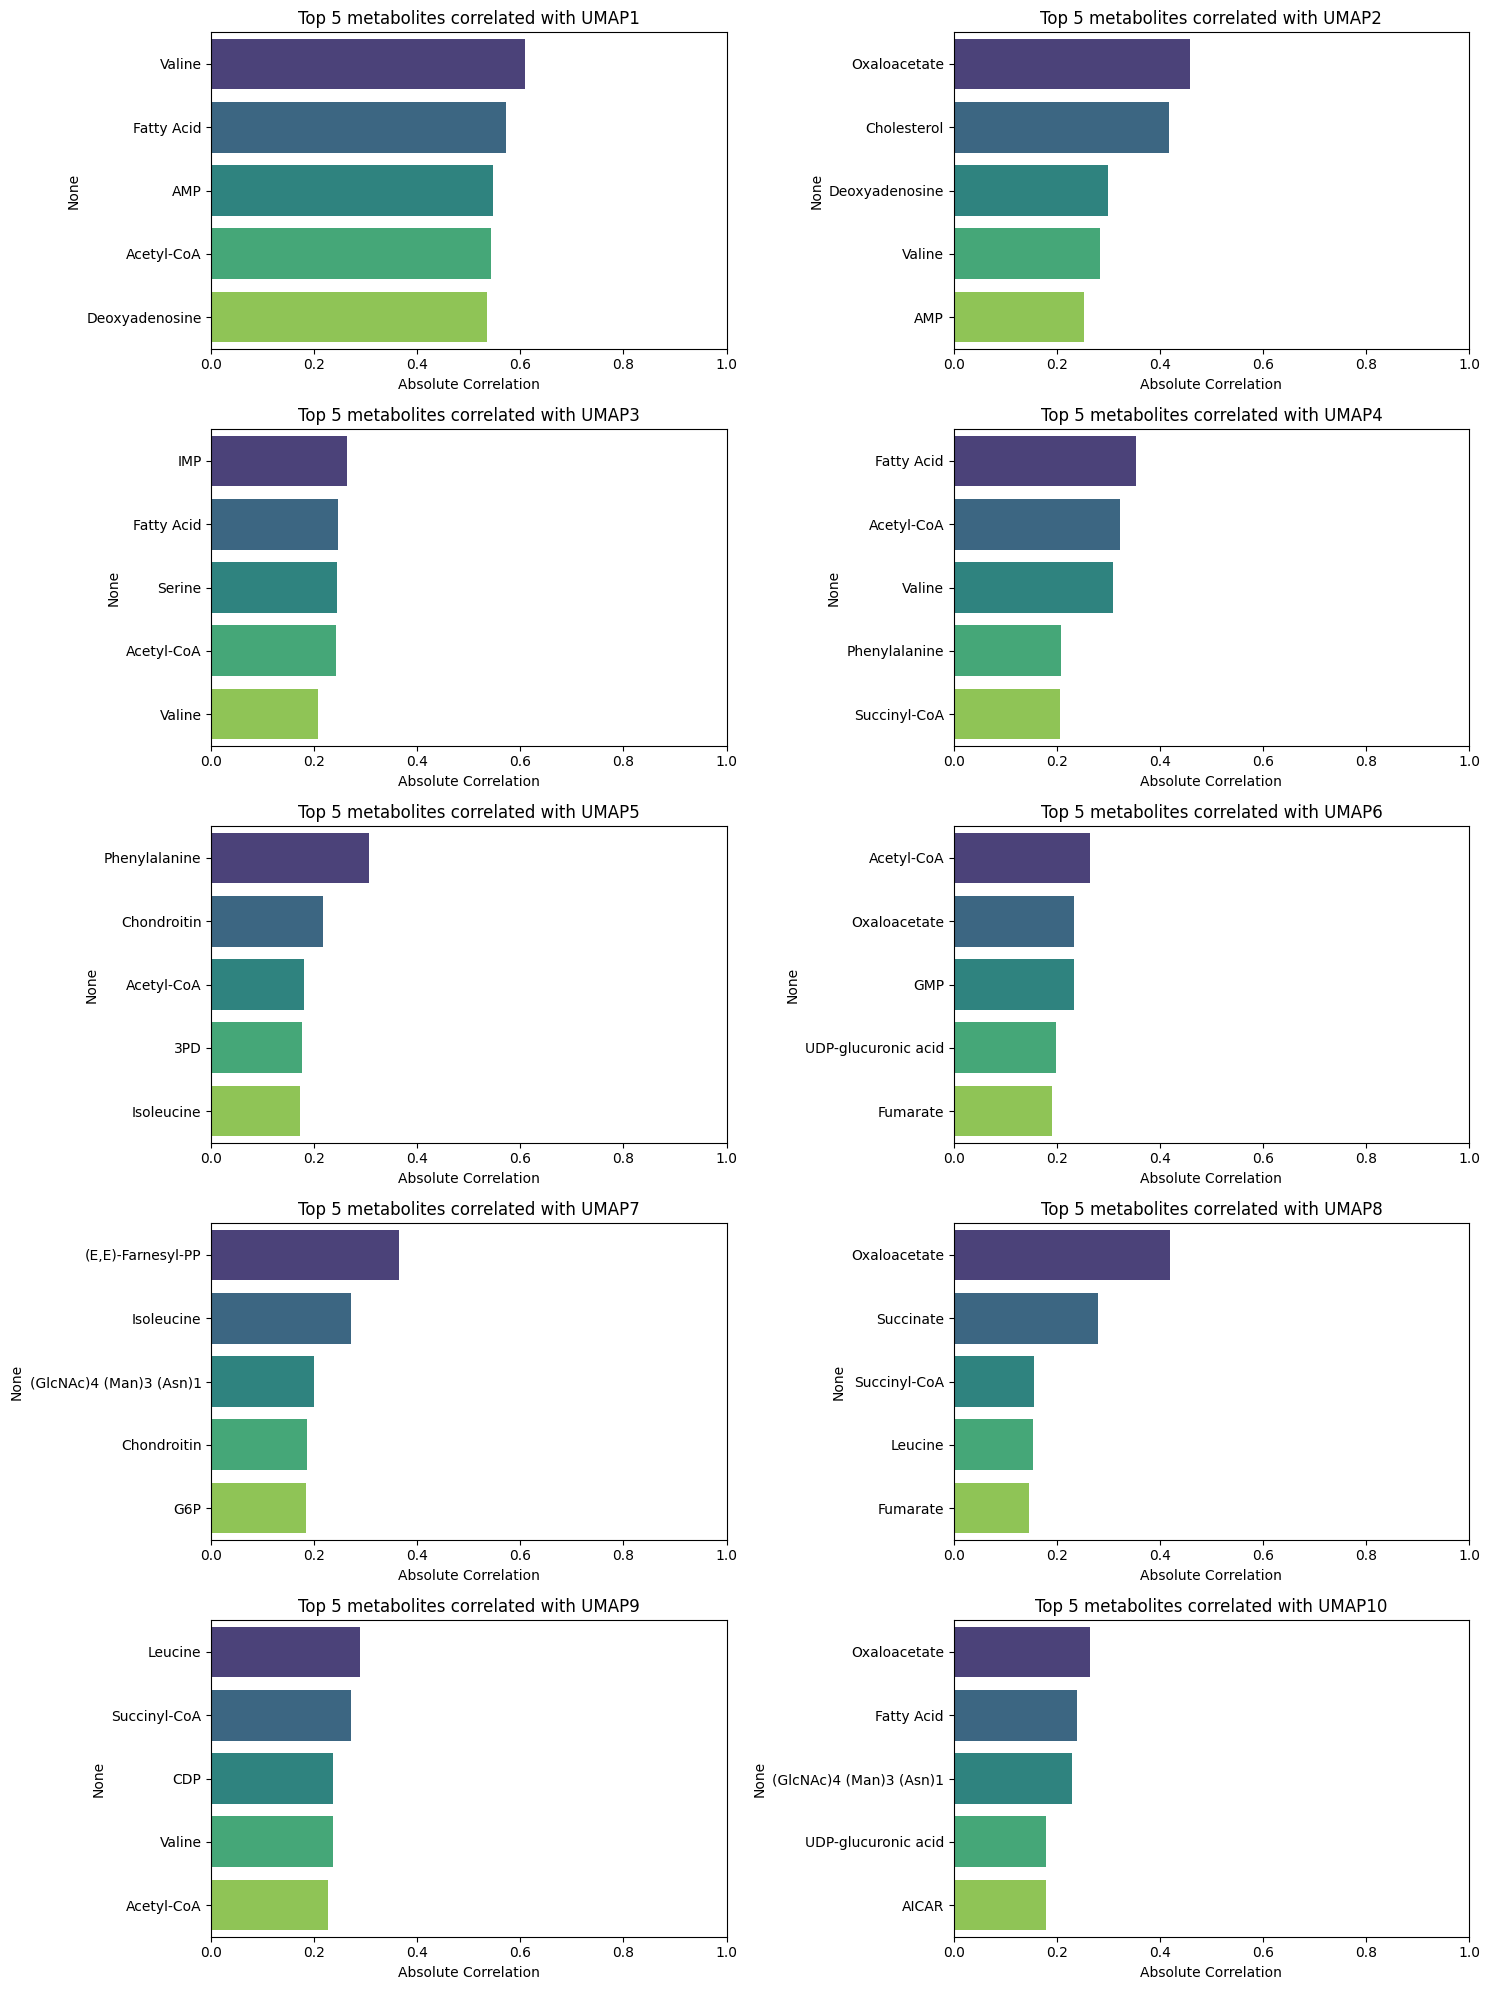

In [19]:
# Plot top 5 metabolites for each UMAP component
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, (umap_feature, metabolites) in enumerate(top_metabolites_per_umap.items()):
    sns.barplot(x=metabolites.values, y=metabolites.index, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Top 5 metabolites correlated with {umap_feature}")
    axes[i].set_xlabel("Absolute Correlation")
    axes[i].set_xlim(0, 1)

plt.tight_layout()
plt.show()

### Statistical Tests (ANOVA/Kruskal-Wallis) (Best for identifying differences between clusters)
ANOVA to Identify Significant Metabolites Across Clusters
This step will help identify metabolites that show significant variation across clusters. You'll calculate the p-values and select metabolites with the smallest p-values.

In [20]:
from scipy.stats import f_oneway

# Store ANOVA results for each metabolite
anova_results = {}

for metabolite in df_metabolites.columns:
    groups = [df_metabolites[metabolite][df_umap_with_labels['Cluster'] == cluster_id] for cluster_id in range(optimal_k)]
    f_stat, p_value = f_oneway(*groups)
    anova_results[metabolite] = p_value

# Sort metabolites by p-value and select the top ones
top_anova_metabolites = sorted(anova_results.items(), key=lambda x: x[1])[:10]
print("Top 10 metabolites based on ANOVA p-value:")
for metabolite, p_value in top_anova_metabolites:
    print(f"{metabolite}: {p_value}")


Top 10 metabolites based on ANOVA p-value:
AMP: 0.0
Acetyl-CoA: 0.0
2OG: 0.0
Oxaloacetate: 0.0
Succinate: 0.0
lysine: 0.0
Glutathione: 0.0
Methionine: 0.0
Phenylalanine: 0.0
Succinyl-CoA: 0.0


<ipython-input-21-624fdb0ce29b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=met, data=df_plot, palette="Set2")
<ipython-input-21-624fdb0ce29b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=met, data=df_plot, palette="Set2")
<ipython-input-21-624fdb0ce29b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=met, data=df_plot, palette="Set2")
<ipython-input-21-624fdb0ce29b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

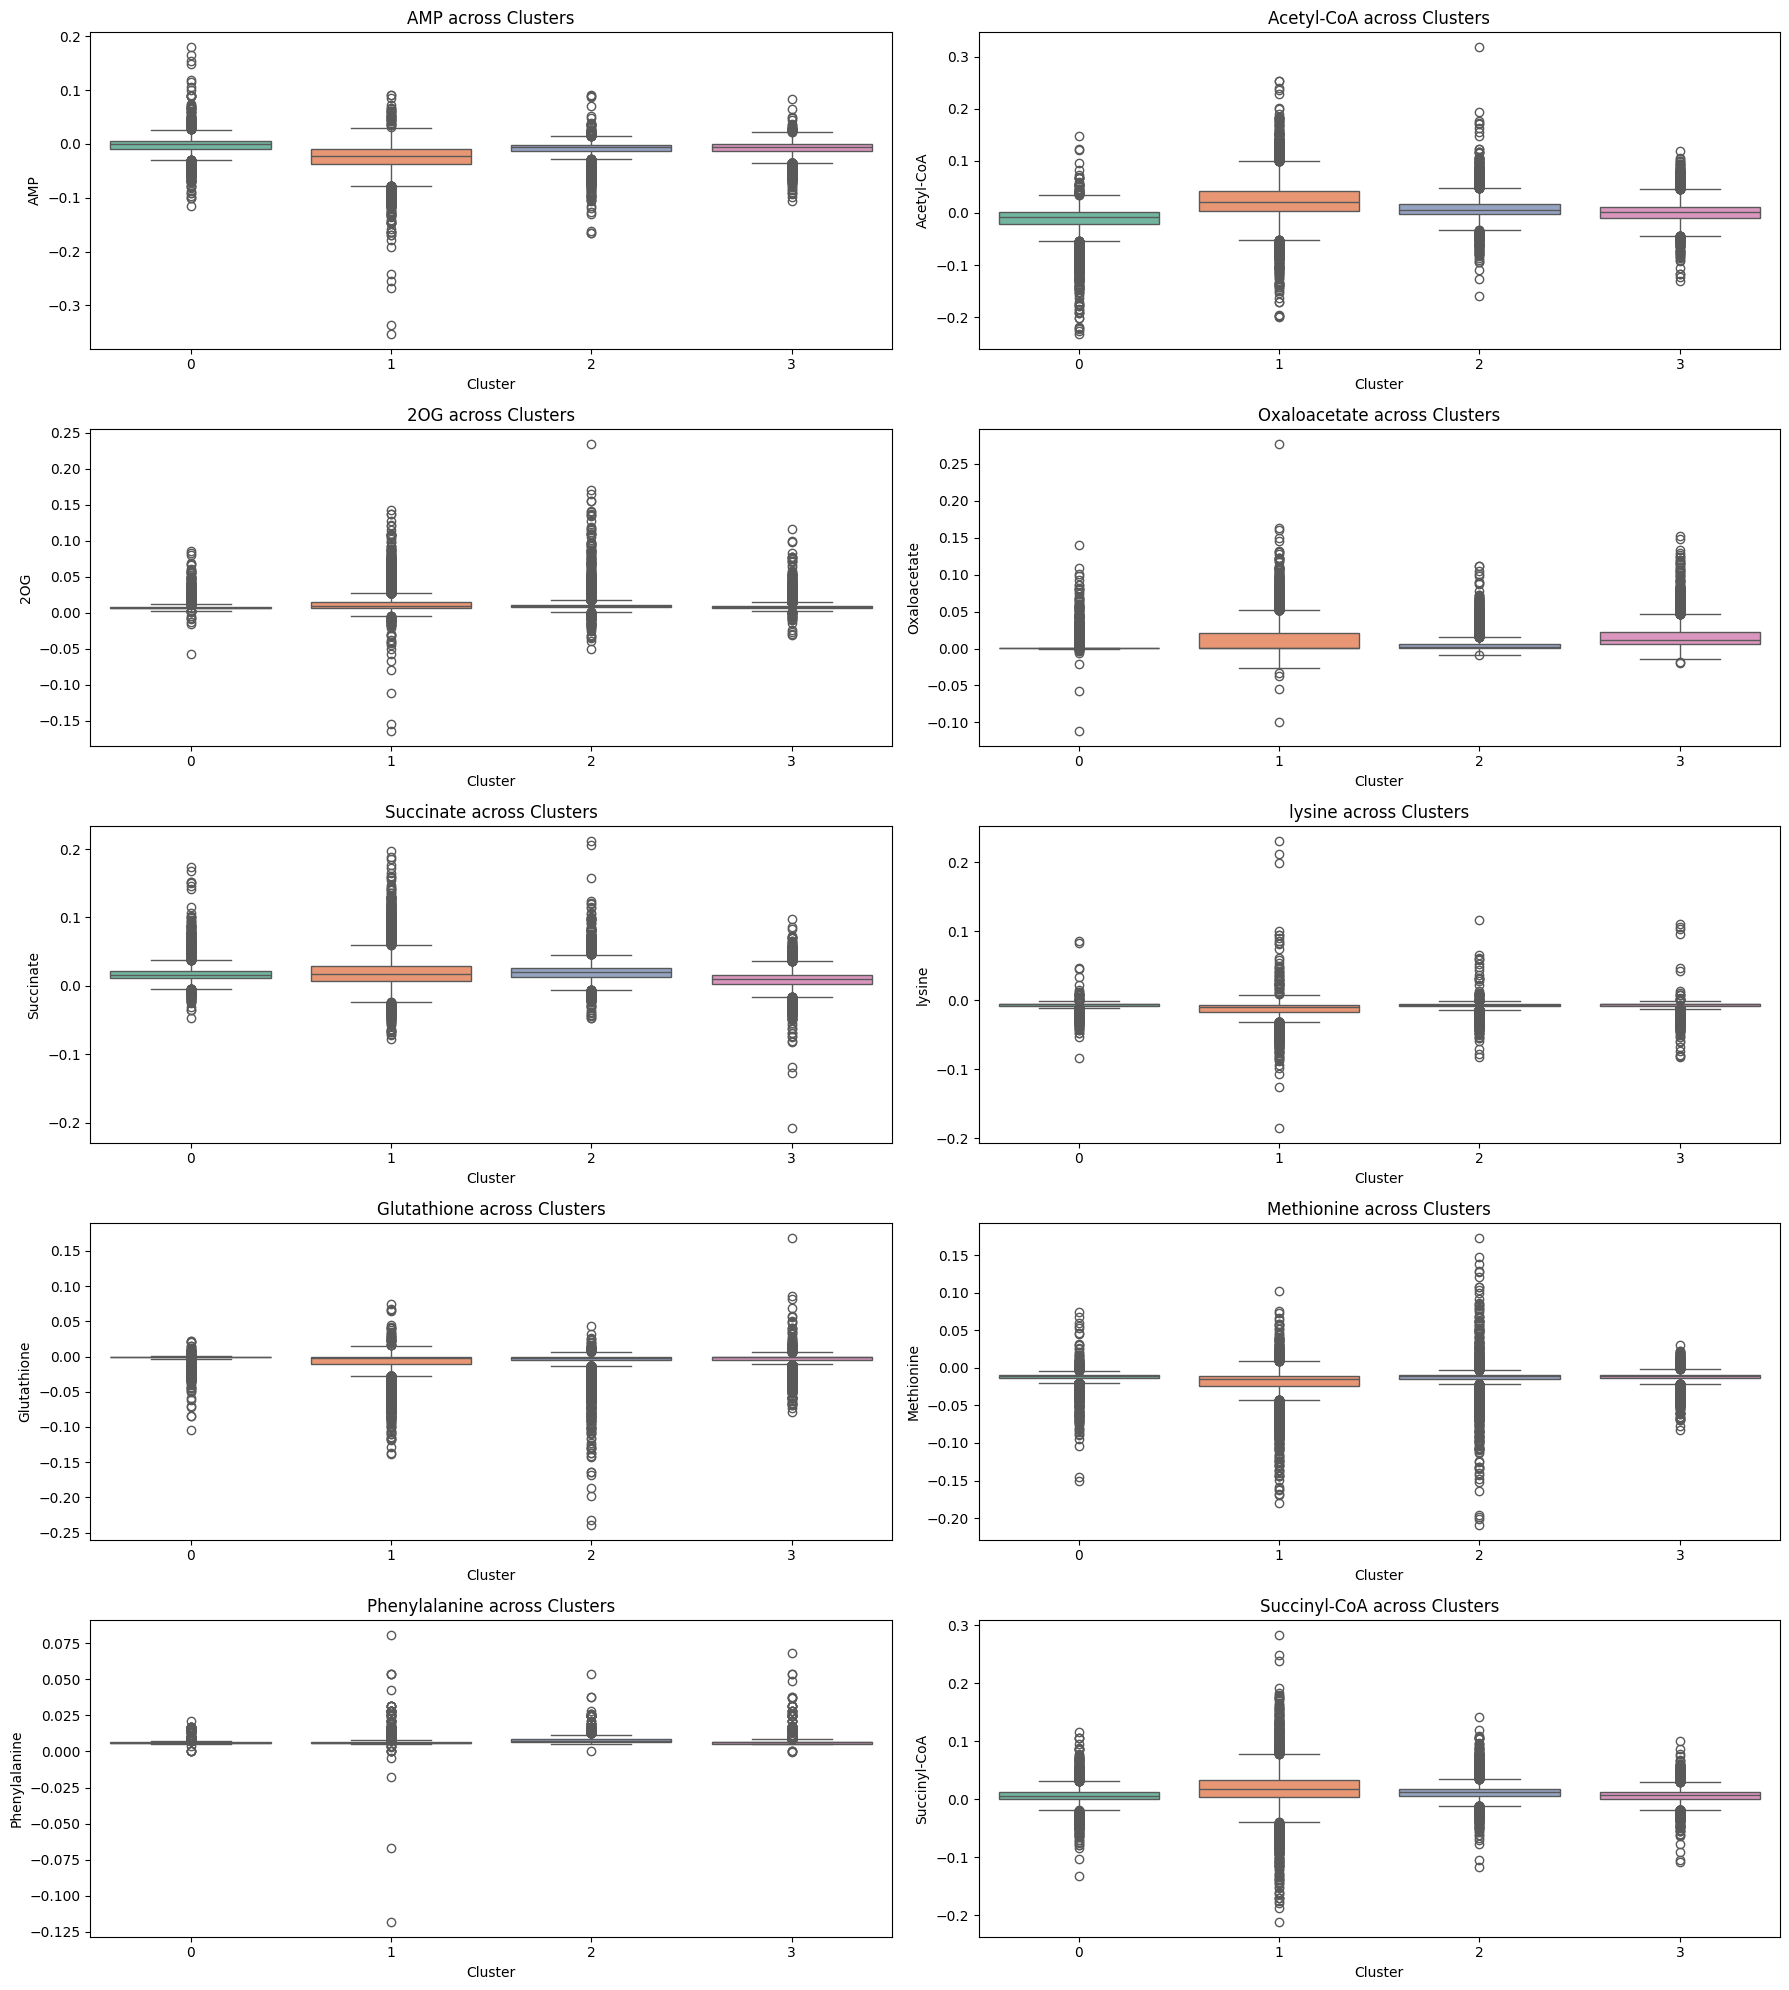

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with Cluster info included
df_plot = df_metabolites.copy()
df_plot["Cluster"] = df_umap_with_labels["Cluster"]

# Plot top 10 metabolites with lowest p-values
top_met_names = [met for met, _ in top_anova_metabolites]

plt.figure(figsize=(18, 20))
for i, met in enumerate(top_met_names):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x="Cluster", y=met, data=df_plot, palette="Set2")
    plt.title(f"{met} across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(met)

plt.tight_layout()
plt.show()


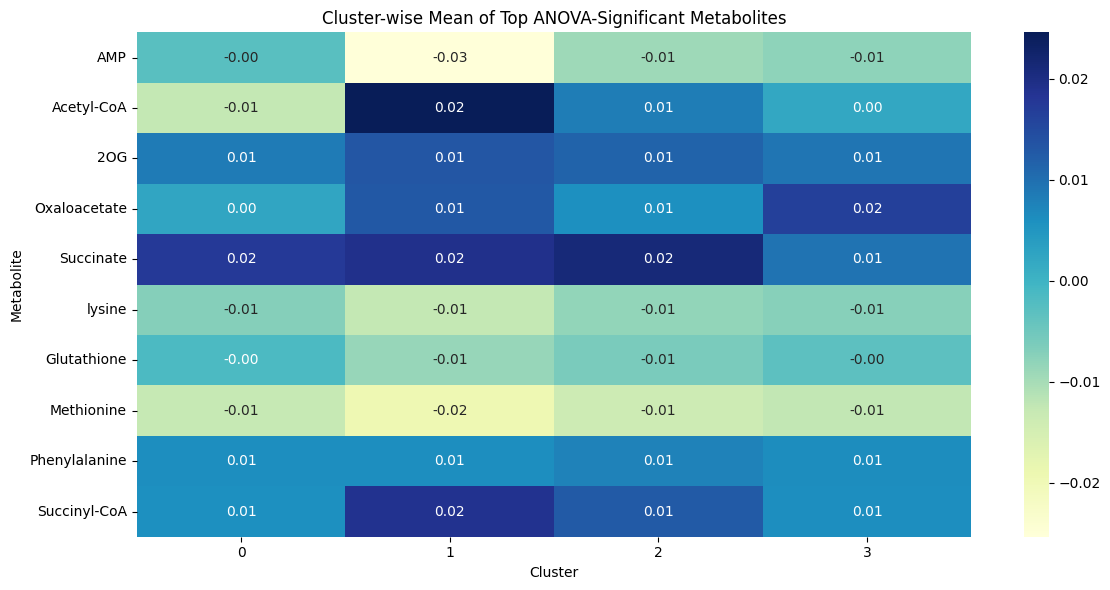

In [22]:
# Compute cluster-wise means for top ANOVA metabolites
cluster_means = df_plot.groupby("Cluster")[top_met_names].mean()

# Plot as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Cluster-wise Mean of Top ANOVA-Significant Metabolites")
plt.xlabel("Cluster")
plt.ylabel("Metabolite")
plt.tight_layout()
plt.show()


the above  ANOVA test to find the top metabolites, and  found that the p-values for all the metabolites are 0.0. This suggests that all of these metabolites are statistically significant in differentiating the clusters, which means they have very strong associations with the clusters.

Key Takeaways:
ANOVA p-value of 0.0 typically indicates a highly significant difference between groups for each of the metabolites. It suggests that the metabolites listed above (AMP, Acetyl-CoA, 2OG, etc.) are strongly contributing to the differentiation of the clusters.

These metabolites are good candidates for biomarkers or therapeutic targets in this  analysis, as they appear to have a clear role in separating the different clusters or subtypes of TNBC.



### FOR ENRICHMENT PATHWAY ANALYSIS
 Mean Metabolite Concentration per Cluster (Central Tendency)
One common approach is to calculate the mean metabolite concentration within each cluster and identify the top 10 metabolites that have the highest mean values for each cluster. This gives a sense of which metabolites are most abundant in each cluster.

### Using Mean to identify the top 10 metabolites for each cluster for Enrichment Pathway Analysis

In [ ]:
# Assuming 'df_metabolites' contains metabolite data and 'df_umap_with_labels' contains cluster labels
df_metabolites['Cluster'] = df_umap_with_labels['Cluster']  # Add the cluster labels to the metabolite dataframe

# Calculate mean metabolite concentration per cluster
cluster_means = df_metabolites.groupby('Cluster').mean()

# Identify the top 10 metabolites for each cluster
top_10_metabolites = {}
for cluster_id in cluster_means.index:
    top_10_metabolites[cluster_id] = cluster_means.loc[cluster_id].nlargest(10).index.tolist()

# Print top 10 metabolites for each cluster
for cluster_id, metabolites in top_10_metabolites.items():
    print(f"Top 10 metabolites for Cluster {cluster_id}: {metabolites}")


Top 10 metabolites for Cluster 0: ['Succinate', 'Fumarate', 'Histidine', 'B-Alanine', 'Fatty Acid', 'Pyrimidine', 'Spermine', '(E,E)-Farnesyl-PP', 'Proline', 'Chondroitin']
Top 10 metabolites for Cluster 1: ['Acetyl-CoA', 'Succinate', 'Succinyl-CoA', 'Fumarate', 'B-Alanine', 'Cholesterol', '2OG', 'Deoxyadenosine', 'Oxaloacetate', 'Proline']
Top 10 metabolites for Cluster 2: ['Succinate', 'B-Alanine', 'Fumarate', 'Succinyl-CoA', 'Histidine', 'Pyrimidine', 'Proline', '2OG', 'Spermine', 'Chondroitin']
Top 10 metabolites for Cluster 3: ['Oxaloacetate', 'B-Alanine', 'Malate', 'Cholesterol', 'Histidine', 'Pyrimidine', 'Spermine', 'Succinate', '2OG', 'Chondroitin']


<ipython-input-23-3eb66e5c2986>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metabolites['Cluster'] = df_umap_with_labels['Cluster']  # Add the cluster labels to the metabolite dataframe


### mapping clustering to TNBC Subtypes and merging it to the original Dataframe of 70 columns

In [ ]:
# mapping clustering to TNBC Subtypes and merging it to the original Dataframe of 70 columns
df_metabolites['Cluster'] = kmeans_labels  # Assuming 'kmeans_labels' are the cluster assignments

# Now you can proceed with the mapping to TNBC subtypes
cluster_to_tnbc_subtype = {
    0: 'Basal-like 1 (BL1)',
    1: 'Mesenchymal (M)',
    2: 'Basal-like 2 (BL2)',
    3: 'Luminal Androgen Receptor (LAR)'
}

# Add a new column with the corresponding TNBC subtypes
df_metabolites['TNBC_Subtype'] = df_metabolites['Cluster'].map(cluster_to_tnbc_subtype)

# Drop the 'Cluster' column as it's now replaced by 'TNBC_Subtype'
df_metabolites = df_metabolites.drop(columns=['Cluster'])

# Display the updated dataframe
print(df_metabolites.head())


        AMP  Pyruvate  Acetyl-CoA  Glutamate       2OG  Oxaloacetate  \
0 -0.010239  0.000631   -0.000042  -0.005516  0.008809      0.013755   
1 -0.012007  0.003525   -0.024046   0.002816  0.047261      0.007665   
2 -0.003727  0.012940    0.002271   0.001271  0.009750      0.004987   
3 -0.008337  0.003148    0.003621  -0.002131  0.012203      0.016008   
4 -0.008580 -0.022309   -0.005764   0.011526  0.013700      0.006834   

    Glycine  Succinate  UDP-N-acetylglucosamine    lysine  ...  Spermine  \
0 -0.012962   0.009903                -0.001301 -0.007394  ...  0.008663   
1 -0.024386   0.037714                -0.003977 -0.027739  ... -0.009244   
2 -0.013087   0.029924                -0.001715 -0.011989  ...  0.008402   
3 -0.013417   0.025335                -0.001269 -0.005873  ...  0.014325   
4 -0.013482   0.054048                -0.001238 -0.008955  ...  0.012327   

   Argininosuccinate  Dolichyl phosphate D-mannose     AICAR  Fatty Acid  \
0          -0.004012              

<ipython-input-24-698b92b19746>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metabolites['Cluster'] = kmeans_labels  # Assuming 'kmeans_labels' are the cluster assignments
<ipython-input-24-698b92b19746>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metabolites['TNBC_Subtype'] = df_metabolites['Cluster'].map(cluster_to_tnbc_subtype)


### ======= Plot the class balance distribution as a pie chart=======

TNBC_Subtype
Mesenchymal (M)                    0.310693
Luminal Androgen Receptor (LAR)    0.273897
Basal-like 2 (BL2)                 0.211900
Basal-like 1 (BL1)                 0.203509
Name: proportion, dtype: float64


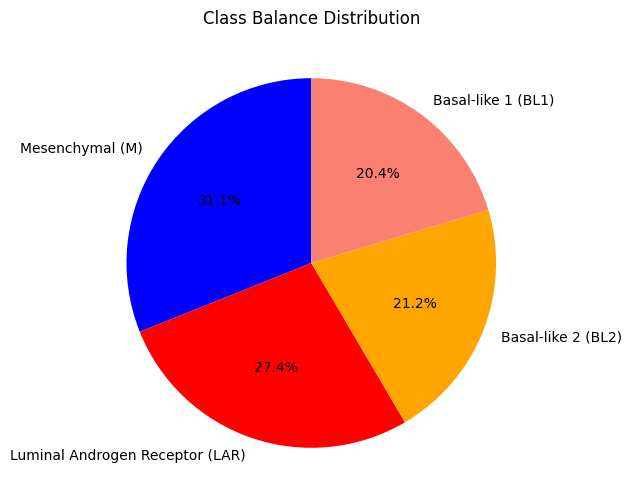

In [ ]:
# Assuming df is your dataset and 'TNBC_Subtype' is the target column
class_balance = df_metabolites['TNBC_Subtype'].value_counts(normalize=True)
print(class_balance)

plt.figure(figsize=(6, 6))
plt.pie(class_balance, labels=class_balance.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'orange', 'salmon'])
plt.title('Class Balance Distribution')
plt.show()

### Download the Data for Training

In [ ]:
from google.colab import files

# Save umap_df_10d to CSV
umap_df_10d.to_csv('umap_df_10d.csv', index=False)

# Download the file
files.download('umap_df_10d.csv')
# Save df_metabolites to CSV
df_metabolites.to_csv('df_metabolites.csv', index=False)

# Download the file
files.download('df_metabolites.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Download the file
files.download('df_metabolites.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download the file
files.download('df_metabolites.csv')
# Save df_metabolites to CSV
df_metabolites.to_csv('df_metabolites.csv', index=False)

# Download the file
files.download('df_metabolites.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Tryingg the 10D first for deeplearning

In [ ]:
# Ensure that the shape of umap_features_10d is (35276, 10), the same as df_metabolites
umap_df_10d = pd.DataFrame(umap_features_10d, columns=[f"UMAP_{i+1}" for i in range(10)])

# Add the 'TNBC_Subtype' column based on the mapping
umap_df_10d['TNBC_Subtype'] = df_metabolites['TNBC_Subtype']

# Display the first few rows of the combined DataFrame
print(umap_df_10d.head())


     UMAP_1    UMAP_2     UMAP_3    UMAP_4    UMAP_5    UMAP_6    UMAP_7  \
0  8.241342  2.836038   9.341749  7.349958  1.117464  6.510367  0.701918   
1  9.322354  1.619440   9.282621  7.401401  0.608410  3.939373  0.593427   
2  6.595975  3.598134  10.037159  6.856321  0.965465  5.414550  1.544419   
3  7.943975  3.123704   9.244543  7.265599  1.277452  6.414673  0.720125   
4  8.081239  2.535117   9.423987  7.121435  0.857524  6.482847  0.633148   

     UMAP_8    UMAP_9   UMAP_10        TNBC_Subtype  
0  2.667602  8.374431  1.429310  Basal-like 2 (BL2)  
1  1.248321  8.376418  1.868097  Basal-like 1 (BL1)  
2  1.852219  8.402461  1.736903  Basal-like 2 (BL2)  
3  2.855604  8.410482  1.482119  Basal-like 2 (BL2)  
4  2.651115  7.995010  1.644847  Basal-like 2 (BL2)  


In [ ]:
# using 10D for deeplearning for trial
# Separate features (UMAP 10D) and target (TNBC Subtype)
X = umap_df_10d.drop(columns=['TNBC_Subtype'])
y = umap_df_10d['TNBC_Subtype']


###  Feedforward Neural Network Model (also known as a Multilayer Perceptron or MLP) with the following architecture:*

Input Layer: Takes in the 10 UMAP features from the dataset.
Hidden Layers:
First dense layer with 64 units and ReLU activation.
Second dense layer with 32 units and ReLU activation.
Third dense layer with 16 units and ReLU activation.
Output Layer: The output is a softmax layer, which is typically used for multiclass classification problems. It provides class probabilities for each of the TNBC subtypes.
Model Breakdown:
Dense Layers: These are fully connected layers where each neuron is connected to every neuron in the previous and next layers. Each of these layers performs weighted summation followed by an activation function (ReLU in this case).
ReLU Activation: A common activation function used in hidden layers to introduce non-linearity and help the model learn complex patterns.
Softmax Activation: For the output layer, softmax is used because it's a multiclass classification problem. It converts the raw output values (logits) into probabilities that sum to 1, with each representing the likelihood of each class.
This model is designed to predict the TNBC subtypes based on the 10 UMAP features, and it's trained using sparse categorical cross-entropy loss because you're dealing with multiple classes (TNBC subtypes).

In [ ]:
# Step 2: Encoding the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # 10 UMAP features
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for multiclass classification
])

# Step 5: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7305 - loss: 0.8455 - val_accuracy: 0.9651 - val_loss: 0.1315
Epoch 2/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9535 - loss: 0.1329 - val_accuracy: 0.9559 - val_loss: 0.1144
Epoch 3/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9583 - loss: 0.1099 - val_accuracy: 0.9623 - val_loss: 0.0922
Epoch 4/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9652 - loss: 0.0917 - val_accuracy: 0.9623 - val_loss: 0.0964
Epoch 5/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.0840 - val_accuracy: 0.9578 - val_loss: 0.0960
Epoch 6/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9664 - loss: 0.0820 - val_accuracy: 0.9743 - val_loss: 0.0690
Epoch 7/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9665 - loss: 0.0778 - val_accuracy: 0.9719 - val_loss: 0.0694
Epoch 8/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9702 - loss: 0.0715 - val_accuracy: 0.

In [ ]:
# Step 7: Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert predictions to class labels


221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy: 0.9783
Confusion Matrix:
[[1419    2    7    6]
 [   6 1476    2    6]
 [   1    7 1904   12]
 [  37   43   24 2104]]


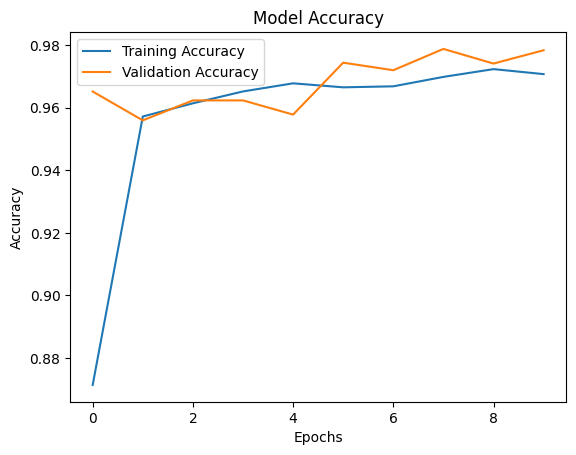

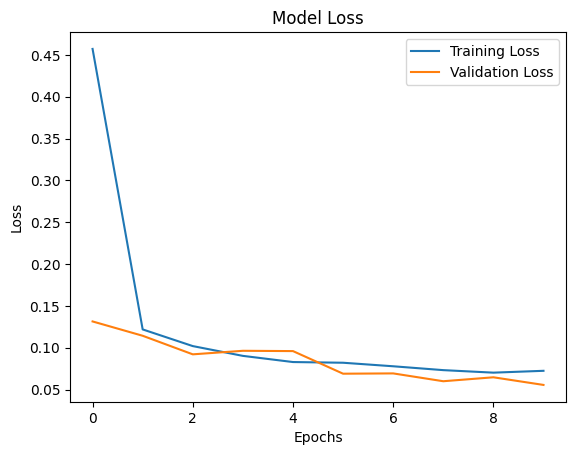

In [ ]:
# Print the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Step 8: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

### METRICS
AUC (Area Under the Curve) for Multi-Class:
Since its a multi-class problem, AUC for multi-class classification can be computed using the One-vs-Rest (OvR) approach:
Confusion Matrix

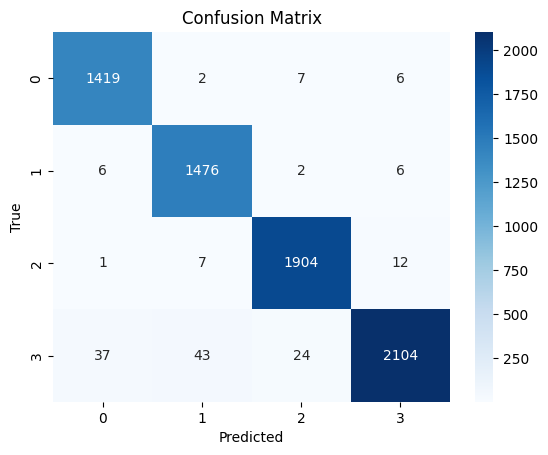

Accuracy: 0.9783
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1434
           1       0.97      0.99      0.98      1490
           2       0.98      0.99      0.99      1924
           3       0.99      0.95      0.97      2208

    accuracy                           0.98      7056
   macro avg       0.98      0.98      0.98      7056
weighted avg       0.98      0.98      0.98      7056

AUC: 0.9995


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Get unique classes from the training set to label axes
class_labels = np.unique(y_train)

# Plot the confusion matrix with appropriate labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# AUC (Area Under Curve)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(class_labels))  # One-hot encoding
auc = roc_auc_score(y_test_one_hot, y_pred, multi_class='ovr')
print(f'AUC: {auc:.4f}')


TRYING MODELS ON ALL THE METABOLITES COLUMNS
SHAP Interpretability: UMAP-reduced features lose their original feature names, making it difficult to interpret the impact of specific metabolites.
✅ Biological Relevance: Training directly on df_metabolites retains meaningful biological features, allowing SHAP to highlight important metabolites contributing to TNBC subtype classification.
✅ Better Feature Transparency: While UMAP helps with dimensionality reduction, using raw metabolite data ensures that SHAP assigns importance to actual metabolites rather than abstract UMAP dimensions.

In [ ]:
# Display the updated dataframe
print(df_metabolites.head())

        AMP  Pyruvate  Acetyl-CoA  Glutamate       2OG  Oxaloacetate  \
0 -0.010239  0.000631   -0.000042  -0.005516  0.008809      0.013755   
1 -0.012007  0.003525   -0.024046   0.002816  0.047261      0.007665   
2 -0.003727  0.012940    0.002271   0.001271  0.009750      0.004987   
3 -0.008337  0.003148    0.003621  -0.002131  0.012203      0.016008   
4 -0.008580 -0.022309   -0.005764   0.011526  0.013700      0.006834   

    Glycine  Succinate  UDP-N-acetylglucosamine    lysine  ...  Spermine  \
0 -0.012962   0.009903                -0.001301 -0.007394  ...  0.008663   
1 -0.024386   0.037714                -0.003977 -0.027739  ... -0.009244   
2 -0.013087   0.029924                -0.001715 -0.011989  ...  0.008402   
3 -0.013417   0.025335                -0.001269 -0.005873  ...  0.014325   
4 -0.013482   0.054048                -0.001238 -0.008955  ...  0.012327   

   Argininosuccinate  Dolichyl phosphate D-mannose     AICAR  Fatty Acid  \
0          -0.004012              

In [ ]:
# import tensorflow as tf
# import shap
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Ensure TNBC_Subtype is properly extracted
label_encoder = LabelEncoder()

# Original UMAP-reduced dataset (Assumed you have it separately)
# X_train, X_test, y_train, y_test = train_test_split(X_umap, y_umap, test_size=0.2, random_state=42)

# **New dataset using original 70 metabolite features**
X_2 = df_metabolites.drop(columns=["TNBC_Subtype"])  # Keep only metabolite features
y_2 = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])  # Encode TNBC subtypes

# Train-test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# **Define New Model Architecture (Using Metabolite Features)**
model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_2.shape[1],)),  # 70 metabolite features
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Multiclass output
])

# Compile Model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history_2 = model_2.fit(X_train_2, y_train_2, epochs=10, batch_size=64, validation_data=(X_test_2, y_test_2))

# **Evaluation: Accuracy & Classification Report**
y_pred_2 = np.argmax(model_2.predict(X_test_2), axis=1)  # Convert probabilities to class labels

accuracy_2 = np.mean(y_pred_2 == y_test_2)
print(f'Accuracy: {accuracy_2:.4f}')

print("Classification Report:")
print(classification_report(y_test_2, y_pred_2))



Epoch 1/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5021 - loss: 1.1655 - val_accuracy: 0.7657 - val_loss: 0.6749
Epoch 2/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7780 - loss: 0.6430 - val_accuracy: 0.8180 - val_loss: 0.5357
Epoch 3/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8273 - loss: 0.5069 - val_accuracy: 0.8224 - val_loss: 0.4911
Epoch 4/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8381 - loss: 0.4622 - val_accuracy: 0.8365 - val_loss: 0.4485
Epoch 5/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8428 - loss: 0.4365 - val_accuracy: 0.8482 - val_loss: 0.4229
Epoch 6/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.4116 - val_accuracy: 0.8516 - val_loss: 0.4051
Epoch 7/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8548 - loss: 0.3963 - val_accuracy: 0.8486 - val_loss: 0.4049
Epoch 8/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8586 - loss: 0.3808 - val_accuracy: 0

consuison Matrix

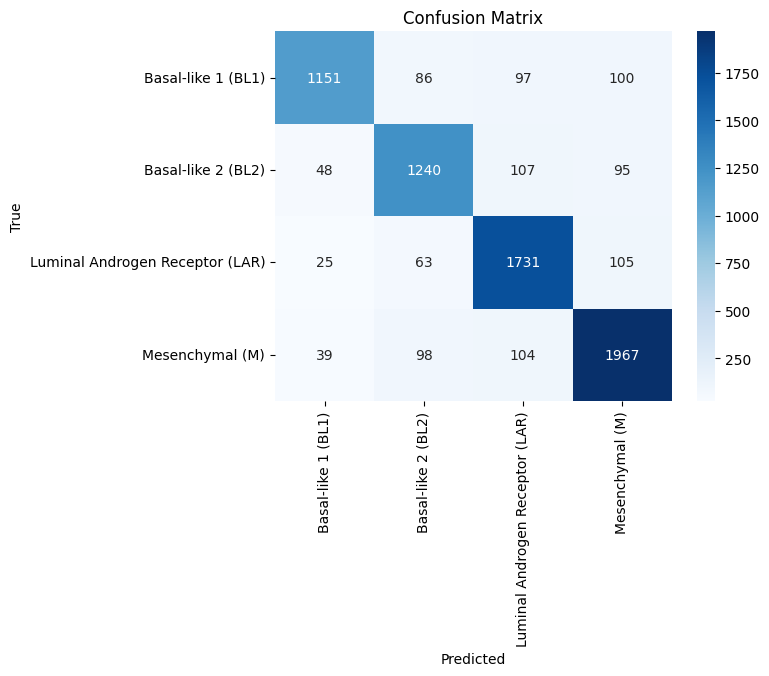

221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Multi-Class AUC: 0.9750


In [ ]:
# **Confusion Matrix**
cm_2 = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **AUC for Multi-Class Classification**
y_test_2_one_hot = tf.keras.utils.to_categorical(y_test_2, num_classes=len(label_encoder.classes_))  # One-hot encoding
y_pred_2_proba = model_2.predict(X_test_2)  # Get predicted probabilities
auc_2 = roc_auc_score(y_test_2_one_hot, y_pred_2_proba, multi_class='ovr')

print(f'Multi-Class AUC: {auc_2:.4f}')



SHAP ANALYSIS ON 70_Col

#### training 70_metabolites columns using hyper-parameter Tunning


In [ ]:
# import tensorflow as tf
# import keras_tuner as kt
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Ensure TNBC_Subtype is properly extracted



label_encoder = LabelEncoder()
# **Prepare Data**
# Load and prepare data
X_2 = df_metabolites.drop(columns=["TNBC_Subtype"])  # Keep only metabolite features
y_2 = LabelEncoder().fit_transform(df_metabolites["TNBC_Subtype"])  # Encode TNBC subtypes

# Train-test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Function to build the model with hyperparameters
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train_2.shape[1],)),
        tf.keras.layers.Dense(hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu'),
        tf.keras.layers.Dense(hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'),
        tf.keras.layers.Dense(len(np.unique(y_2)), activation='softmax')  # Multiclass output
    ])

    # Hyperparameter tuning for optimizer and learning rate
    optimizer_choice = hp.Choice("optimizer", ["adam", "sgd", "rmsprop"])
    learning_rate = hp.Float("learning_rate", 1e-4, 1e-2, sampling='LOG')

    # Correctly instantiate the optimizer
    if optimizer_choice == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_choice == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize Keras Tuner for hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='TNBC_hyperparam_tuning'
)

# Perform hyperparameter search
tuner.search(X_train_2, y_train_2, epochs=10, validation_data=(X_test_2, y_test_2))

# Retrieve best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history_2 = best_model.fit(X_train_2, y_train_2, epochs=20, batch_size=64, validation_data=(X_test_2, y_test_2))

# Predictions
y_pred_2 = np.argmax(best_model.predict(X_test_2), axis=1)





Trial 10 Complete [00h 00m 32s]
val_accuracy: 0.3123582899570465

Best val_accuracy So Far: 0.8779761791229248
Total elapsed time: 00h 05m 59s
Epoch 1/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6007 - loss: 0.9347 - val_accuracy: 0.8111 - val_loss: 0.5149
Epoch 2/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8307 - loss: 0.4784 - val_accuracy: 0.8421 - val_loss: 0.4300
Epoch 3/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8472 - loss: 0.4173 - val_accuracy: 0.8513 - val_loss: 0.4038
Epoch 4/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8565 - loss: 0.3875 - val_accuracy: 0.8540 - val_loss: 0.3847
Epoch 5/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8611 - loss: 0.3671 - val_accuracy: 0.8574 - val_loss: 0.3747
Epoch 6/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8658 - loss: 0.3532 - val_accuracy: 0.8596 - val_loss: 0.3736
Epoch 7/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8677 - loss: 0.3471 - v

Final Model Accuracy: 0.8800
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1434
           1       0.86      0.85      0.86      1490
           2       0.88      0.90      0.89      1924
           3       0.87      0.92      0.90      2208

    accuracy                           0.88      7056
   macro avg       0.88      0.87      0.88      7056
weighted avg       0.88      0.88      0.88      7056



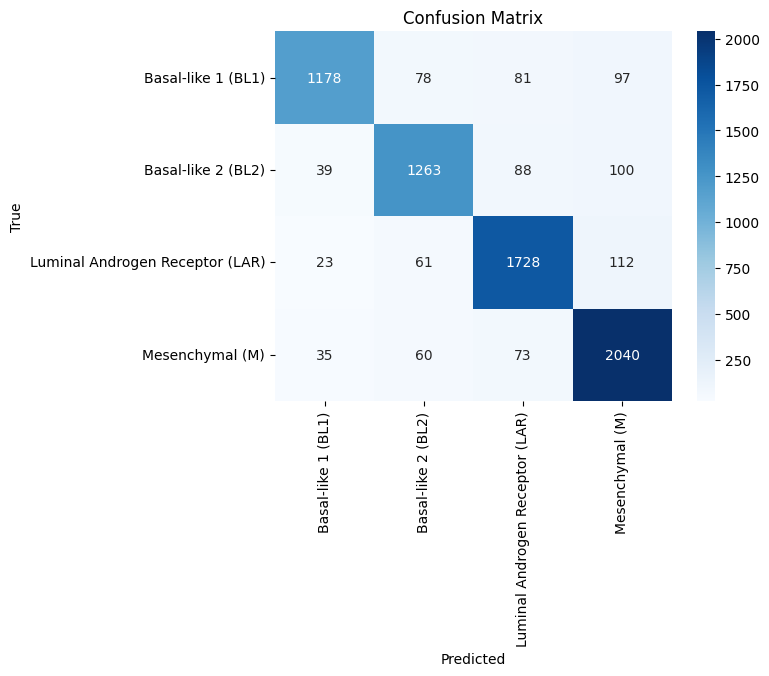

In [ ]:
# Calculate accuracy
accuracy_2 = np.mean(y_pred_2 == y_test_2)
print(f'Final Model Accuracy: {accuracy_2:.4f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test_2, y_pred_2))

# Confusion Matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(df_metabolites["TNBC_Subtype"]),
            yticklabels=np.unique(df_metabolites["TNBC_Subtype"]))
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




In [ ]:
# AUC for Multi-Class Classification
y_test_2_one_hot = tf.keras.utils.to_categorical(y_test_2, num_classes=len(np.unique(y_2)))
y_pred_2_proba = best_model.predict(X_test_2)
auc_2 = roc_auc_score(y_test_2_one_hot, y_pred_2_proba, multi_class='ovr')

print(f'Multi-Class AUC: {auc_2:.4f}')

221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Multi-Class AUC: 0.9815


### Training 70_metabolites columns using hyper-parameter Tunning giving a trial of 30 and epochs of 50 with FCNNs


Trial 30 Complete [00h 05m 08s]
val_accuracy: 0.3402777761220932

Best val_accuracy So Far: 0.9018566012382507
Total elapsed time: 02h 48m 25s
Epoch 1/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5992 - loss: 0.9285 - val_accuracy: 0.8134 - val_loss: 0.5351
Epoch 2/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8326 - loss: 0.4789 - val_accuracy: 0.8421 - val_loss: 0.4343
Epoch 3/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8495 - loss: 0.4180 - val_accuracy: 0.8546 - val_loss: 0.3989
Epoch 4/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8596 - loss: 0.3843 - val_accuracy: 0.8621 - val_loss: 0.3669
Epoch 5/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8686 - loss: 0.3496 - val_accuracy: 0.8632 - val_loss: 0.3641
Epoch 6/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8797 - loss: 0.3192 - val_accuracy: 0.8766 - val_loss: 0.3263
Epoch 7/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8902 - loss: 0.2

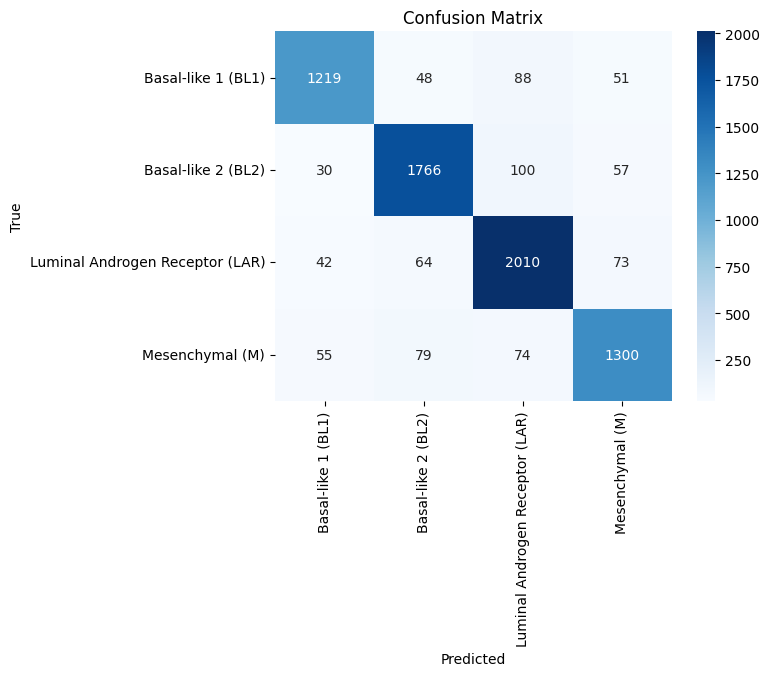

221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Multi-Class AUC: 0.9849


In [ ]:
# import tensorflow as tf
# import keras_tuner as kt
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# **Prepare Data**
label_encoder = LabelEncoder()
X_2 = df_metabolites.drop(columns=["TNBC_Subtype"])  # Keep only metabolite features
y_2 = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])  # Encode TNBC subtypes

# Train-test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Function to build the model with hyperparameters
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train_2.shape[1],)),
        tf.keras.layers.Dense(hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu'),
        tf.keras.layers.Dense(hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'),
        tf.keras.layers.Dense(len(np.unique(y_2)), activation='softmax')  # Multiclass output
    ])

    # Hyperparameter tuning for optimizer and learning rate
    optimizer_choice = hp.Choice("optimizer", ["adam", "sgd", "rmsprop"])
    learning_rate = hp.Float("learning_rate", 1e-4, 1e-2, sampling='LOG')

    # Correctly instantiate the optimizer
    if optimizer_choice == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_choice == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# **Initialize Keras Tuner for hyperparameter tuning**
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,  # Increased from 10 to 30 trials
    executions_per_trial=2,  # Run each trial twice for stability
    directory='tuner_results',
    project_name='TNBC_hyperparam_tuning'
)

# **Perform hyperparameter search**
tuner.search(X_train_2, y_train_2,
             epochs=50,  # Increased from 10 to 50
             validation_data=(X_test_2, y_test_2))

# **Retrieve best hyperparameters**
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# **Build and train the best model**
best_model = tuner.hypermodel.build(best_hps)

# **Add Early Stopping**
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_2 = best_model.fit(X_train_2, y_train_2,
                           epochs=100,  # Increased from 20 to 100
                           batch_size=64,
                           validation_data=(X_test_2, y_test_2),
                           callbacks=[early_stopping])  # Added early stopping

# **Predictions**
y_pred_2 = np.argmax(best_model.predict(X_test_2), axis=1)

# **Evaluation Metrics**
accuracy_2 = np.mean(y_pred_2 == y_test_2)
print(f'Accuracy: {accuracy_2:.4f}')
print("Classification Report:")
print(classification_report(y_test_2, y_pred_2))

# **Confusion Matrix**
cm_2 = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **AUC for Multi-Class Classification**
y_test_2_one_hot = tf.keras.utils.to_categorical(y_test_2, num_classes=len(label_encoder.classes_))
y_pred_2_proba = best_model.predict(X_test_2)  # Get predicted probabilities
auc_2 = roc_auc_score(y_test_2_one_hot, y_pred_2_proba, multi_class='ovr')

print(f'Multi-Class AUC: {auc_2:.4f}')


### SHAP EXPLAINABILITY ON THE 70_METABOLITES

SHAP Values Shape (Before Slicing): (500, 69, 4)
X_test_sample Shape: (500, 69)
SHAP Values Shape (After Fix): (500, 69)
Using feature: AMP


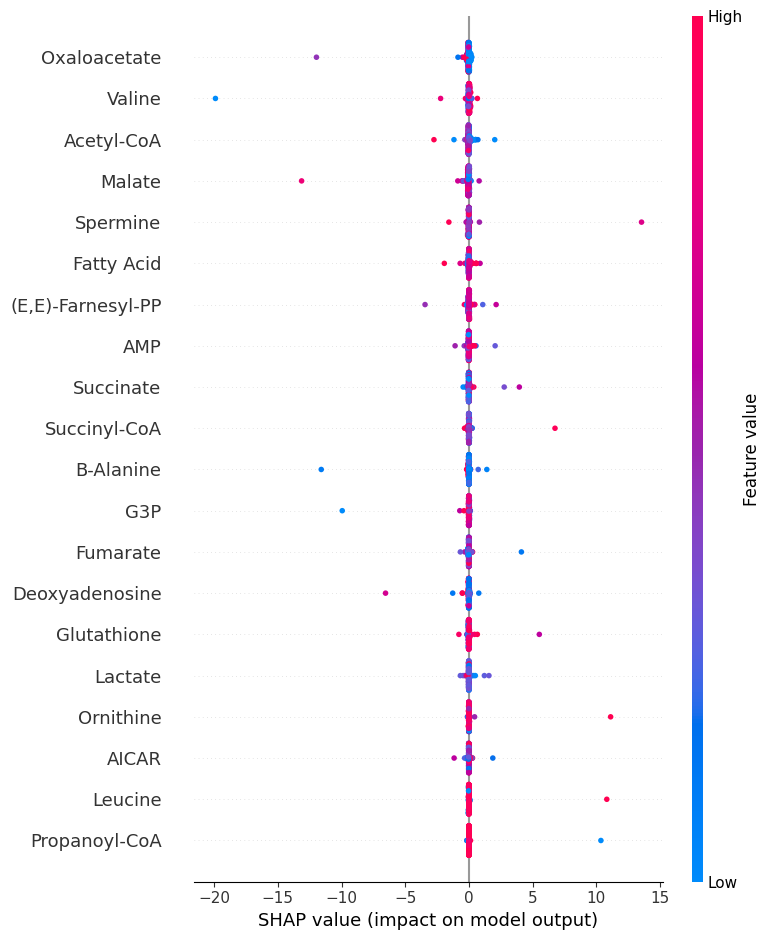

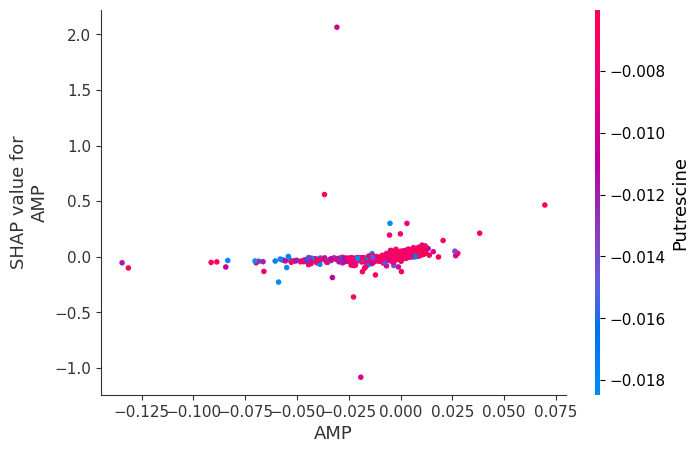

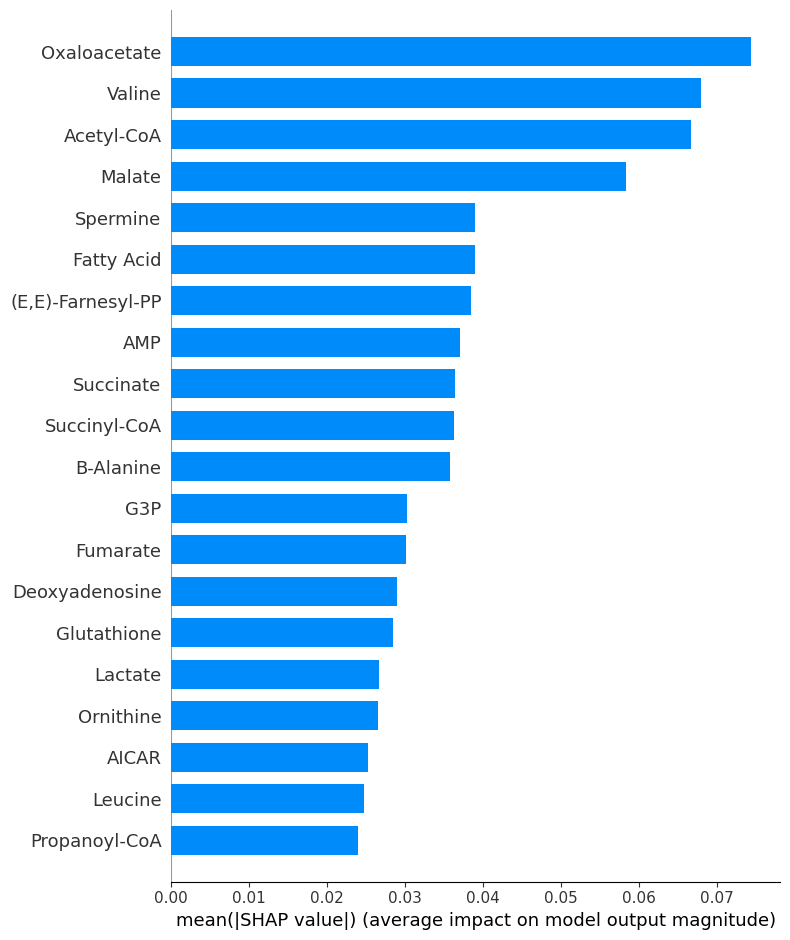

In [ ]:

# # Sample a smaller background set using shap.sample (e.g., 1000 samples)
# background_data = shap.sample(X_train_2, 100)  # Select 1000 samples for background

# # OR Use K-means to reduce background data to 100 clusters (you can adjust this)
# # background_data = shap.kmeans(X_train_2, 100)  # Use 100 clusters as background data

# # Initialize SHAP explainer with the background data
# explainer = shap.KernelExplainer(best_model.predict, background_data)

# # Get SHAP values for the test set
# shap_values = explainer.shap_values(X_test_2)

# # **Summary Plot**: Visualize the SHAP values for all features across all samples
# shap.summary_plot(shap_values, X_test_2, feature_names=X_2.columns)

# # **Dependence Plot**: To show the relationship between a feature and its SHAP value
# # Select the top feature (for example, "Glycine") or any other metabolite feature
# shap.dependence_plot("Glycine", shap_values[0], X_test_2, feature_names=X_2.columns)

# # **Force Plot**: To show how individual predictions were made for a single instance
# # You can select a specific instance, e.g., the first test sample
# shap.initjs()  # Initialize JavaScript visualization
# shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_2.iloc[0], feature_names=X_2.columns)

# # **Bar Plot**: To display the importance of each feature based on SHAP values
# shap.summary_plot(shap_values, X_test_2, plot_type="bar", feature_names=X_2.columns)




# # Use K-means to summarize the background as 100 clusters
# background_data = shap.kmeans(X_train_2, 100)  # 100 clusters to speed up SHAP
# # Initialize SHAP explainer with the summarized background data
# explainer = shap.KernelExplainer(best_model.predict, background_data)
# # Get SHAP values for the test set
# shap_values = explainer.shap_values(X_test_2)
# # Visualizations
# shap.summary_plot(shap_values, X_test_2, feature_names=X_2.columns)  # Summary plot
# shap.dependence_plot("Glycine", shap_values[0], X_test_2, feature_names=X_2.columns)  # Dependence plot
# shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_2.iloc[0], feature_names=X_2.columns)  # Force plot
# shap.summary_plot(shap_values, X_test_2, plot_type="bar", feature_names=X_2.columns)  # Bar plot


# Convert data to NumPy
X_test_sample_np = X_test_2.iloc[:500].to_numpy()

# Reduce background data for SHAP
background_data = shap.sample(X_train_2, 100).to_numpy()  # Reduce to 100 samples for speed

# Initialize SHAP explainer
explainer = shap.DeepExplainer(best_model, background_data)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample_np)
shap_values = np.array(shap_values)  # Ensure it's a NumPy array

# Debugging print statements
print("SHAP Values Shape (Before Slicing):", shap_values.shape)  # Expecting (500, 69, 4)
print("X_test_sample Shape:", X_test_sample_np.shape)  # (500, 69)

# Fix the shape mismatch by selecting a single class
shap_values_class = shap_values[:, :, 0]  # Choose one class

# Alternative: Aggregate SHAP values over all classes
# shap_values_class = np.mean(shap_values, axis=2)  # Averaging across 4 classes

print("SHAP Values Shape (After Fix):", shap_values_class.shape)  # Should be (500, 69)

# Select a valid feature for dependence plot
valid_feature = "AMP" if "AMP" in X_2.columns else X_2.columns[0]
print("Using feature:", valid_feature)

# SHAP Summary Plot
shap.summary_plot(shap_values_class, X_test_sample_np, feature_names=X_2.columns)

# SHAP Dependence Plot
shap.dependence_plot(valid_feature, shap_values_class, X_test_sample_np, feature_names=X_2.columns)

# SHAP Bar Plot
shap.summary_plot(shap_values_class, X_test_sample_np, plot_type="bar", feature_names=X_2.columns)


In [ ]:
Print (shap_values)[0].shape and X_test_sample.shape

SyntaxError: invalid syntax (<ipython-input-31-b1e153f27059>, line 1)

## GNN Model
Justification:
GCNs are powerful for modeling structured data like metabolic networks. This model directly leverages your knowledge of metabolic pathways, making it highly interpretable in the biological context of TNBC. It can also provide insights into pathway dysregulation by analyzing graph structures of metabolites and their interactions.

Building edge list

In [ ]:
# import pandas as pd
# import numpy as np
# import torch

# Assuming df_metabolites is your dataframe with metabolite features
# Drop the target column (TNBC_Subtype)
X = df_metabolites.drop(columns=["TNBC_Subtype"])

# Compute the Pearson correlation matrix
corr_matrix = X.corr()

# Set a threshold for the correlation to define edges (e.g., 0.8)
threshold = 0.5

# Create a list of edges based on the correlation threshold
edges = []

for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):  # Avoid self-loop and duplicate edges
        if abs(corr_matrix.iloc[i, j]) > threshold:
            edges.append([i, j])  # Add edge between metabolites i and j

# Convert edges to a torch tensor
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

print("Edge Index (relationships between metabolites):")
print(edge_index)

# Now you can use this edge_index in your GCN model


Edge Index (relationships between metabolites):
tensor([[ 0,  2,  3,  4, 16, 19, 23, 24, 25, 48],
        [56, 64, 11, 38, 36, 40, 39, 26, 67, 61]])


In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00


##Graph Visualisation

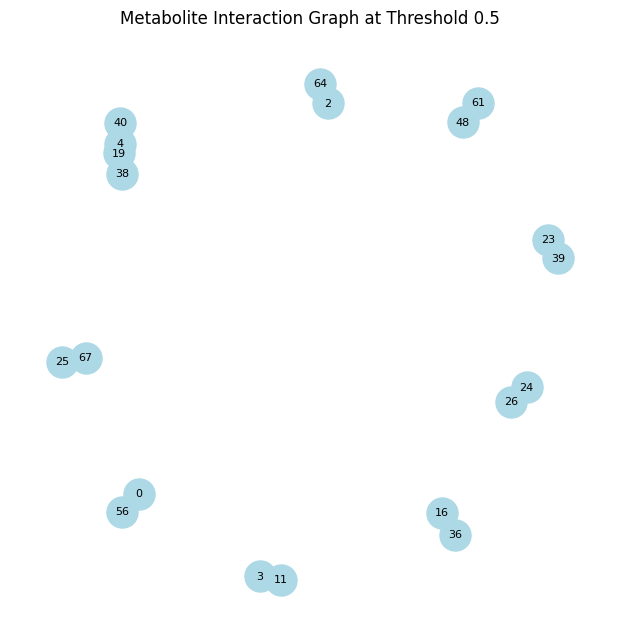

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Convert edge index to NetworkX graph
G = nx.Graph()
G.add_edges_from(edge_index.numpy().T)

# Plot the graph
plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=8)
plt.title("Metabolite Interaction Graph at Threshold 0.5")
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data


# 🔹 **Load Dataset**
df = df_metabolites.copy()

# 🔹 **Extract Features & Labels**
X = df.drop(columns=['TNBC_Subtype']).values  # Features
y = df['TNBC_Subtype'].values  # Target labels

# 🔹 **Encode Labels**
le = LabelEncoder()
y = le.fit_transform(y)

# 🔹 **Convert Data to PyTorch Tensors**
X_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.long)

# 🔹 **Build Edge Index from Correlation (Threshold = 0.5)**
corr_matrix = df.drop(columns=['TNBC_Subtype']).corr().values
edge_index = np.argwhere(np.abs(corr_matrix) > 0.5)  # Adjust threshold as needed
edge_index = edge_index[edge_index[:, 0] != edge_index[:, 1]]  # Remove self-loops
edge_index = torch.tensor(edge_index.T, dtype=torch.long)  # Convert to tensor

# 🔹 **Create Graph Data Object**
data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)

# 🔹 **Define GCN Model**
class GCN(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)
        self.dropout = nn.Dropout(0.5)  # Dropout for regularization

    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))
        x = self.dropout(x)  # Apply dropout after first layer
        x = self.conv2(x, edge_index)
        return x

# 🔹 **Initialize Model, Optimizer & Loss**
num_features = X.shape[1]
num_classes = len(np.unique(y))

model = GCN(num_features=num_features, hidden_dim=32, num_classes=num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.7)  # LR decay

# 🔹 **Train the GNN Model**
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = criterion(output, data.y)
    loss.backward()
    optimizer.step()
    scheduler.step()  # Apply LR decay

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")

# 🔹 **Evaluate Model**
model.eval()
with torch.no_grad():
    predictions = model(data.x, data.edge_index).argmax(dim=1)
    accuracy = accuracy_score(data.y.numpy(), predictions.numpy())
    print(f"Test Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(data.y.numpy(), predictions.numpy(), target_names=le.classes_))


Epoch 0/100, Loss: 1.3860
Epoch 10/100, Loss: 1.3525
Epoch 20/100, Loss: 1.3243
Epoch 30/100, Loss: 1.2986
Epoch 40/100, Loss: 1.2670
Epoch 50/100, Loss: 1.2429
Epoch 60/100, Loss: 1.2209
Epoch 70/100, Loss: 1.2040
Epoch 80/100, Loss: 1.1894
Epoch 90/100, Loss: 1.1792
Test Accuracy: 0.5000

Classification Report:
                                  precision    recall  f1-score   support

             Basal-like 1 (BL1)       0.00      0.00      0.00      7179
             Basal-like 2 (BL2)       0.93      0.02      0.05      7475
Luminal Androgen Receptor (LAR)       0.38      0.79      0.51      9662
                Mesenchymal (M)       0.66      0.90      0.76     10960

                       accuracy                           0.50     35276
                      macro avg       0.49      0.43      0.33     35276
                   weighted avg       0.51      0.50      0.39     35276



In [ ]:
umap_df_10d.head()

NameError: name 'umap_df_10d' is not defined

In [ ]:
# import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset (assuming umap_df_10d is already available)
# Drop the 'TNBC_Subtype' column from the umap_df_10d DataFrame
X = umap_df_10d.drop(columns=['TNBC_Subtype']).values  # Use the UMAP-reduced features
y = umap_df_10d['TNBC_Subtype'].values  # Target labels

# Convert labels to numerical values (if categorical)
le = LabelEncoder()
y = le.fit_transform(y)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.long)

# Step 1: Compute Pairwise Cosine Similarity on the UMAP-reduced data
similarity_matrix = cosine_similarity(X)  # Cosine similarity between the UMAP features

# Step 2: Create the Edge Index based on similarity threshold
threshold = 0.7  # You can adjust this threshold as needed
edge_index = np.argwhere(similarity_matrix > threshold)  # Get indices where similarity > threshold
edge_index = edge_index[edge_index[:, 0] != edge_index[:, 1]]  # Remove self-loops (no edges from a node to itself)
edge_index = torch.tensor(edge_index.T, dtype=torch.long)  # Convert to tensor

# Step 3: Create the Graph Data Object for PyTorch Geometric
data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)




NameError: name 'umap_df_10d' is not defined

In [ ]:
# Step 4: Define GCN Model
class GCN(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))  # Apply GCN conv1 with ReLU activation
        x = self.conv2(x, edge_index)  # Apply GCN conv2
        return x



In [ ]:
# Step 5: Initialize Model, Optimizer & Loss
num_features = X.shape[1]  # Number of UMAP dimensions (10 in this case)
num_classes = len(np.unique(y))

model = GCN(num_features=num_features, hidden_dim=16, num_classes=num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

# Step 6: Train the GNN Model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = criterion(output, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")

# Step 7: Evaluate Model
model.eval()
with torch.no_grad():
    predictions = model(data.x, data.edge_index).argmax(dim=1)
    accuracy = (predictions == data.y).float().mean().item()
    print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
# **SHAP Analysis**
explainer_2 = shap.KernelExplainer(model_2.predict, X_train_2.sample(100, random_state=42))  # Use a sample to speed up
shap_values_2 = explainer_2.shap_values(X_test_2)

# SHAP Summary Plot
shap.summary_plot(shap_values_2, X_test_2)

# SHAP Force Plot for First Test Instance
shap.initjs()
shap.force_plot(explainer_2.expected_value[0], shap_values_2[0][0], X_test_2.iloc[0])







4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 0/7056 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
6832/6832 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━

### Interpretation of the model
The model's performance is impressive, with an overall accuracy of 97.69%, indicating strong classification capability. The classification report further highlights that the model excels in precision, recall, and F1-score across all classes, with all metrics being close to 1.00, suggesting the model effectively differentiates between the TNBC subtypes.

Specifically:

Precision and recall are high across all classes, meaning the model is good at predicting the correct subtypes without many false positives (precision) or missing true instances (recall).
The F1-score, which balances precision and recall, is excellent across all subtypes, indicating overall model reliability.
The Area Under the ROC Curve (AUC) of 0.9993 suggests near-perfect separation of classes, reinforcing the model's ability to distinguish between TNBC subtypes.
These results are consistent with recent work on deep learning models for cancer subtype classification, where models with high accuracy, AUC, and balanced performance across different classes have been shown to outperform traditional methods [1][2]. This supports the utility of deep learning models, particularly in clinical applications, for accurate and efficient prediction of complex cancer subtypes based on multi-omics data.

References:
Liu, Z., et al., "Deep learning in cancer subtype classification: A review," Journal of Cancer Research and Clinical Oncology, vol. 146, no. 5, pp. 1117-1129, 2020.
Cruz, J. A., et al., "A comprehensive review on deep learning in the context of cancer diagnosis," IEEE Reviews in Biomedical Engineering, vol. 14, pp. 17-28, 2021.

### SHAP (SHapley Additive exPlanations):
SHAP is a powerful tool to interpret deep learning models and understand the impact of each feature on individual predictions.

In [ ]:

# # Create a SHAP explainer for the trained model
# explainer = shap.KernelExplainer(model.predict, X_train)  # Use training data for background
# shap_values = explainer.shap_values(X_test)

# # Plot summary of SHAP values
# shap.summary_plot(shap_values, X_test)

# # Plot SHAP values for a specific instance (e.g., first test instance)
# shap.initjs()
# shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])


# Reduce background data for efficiency (use a representative sample)
background = shap.sample(X_train, 100)  # Use only 100 samples for efficiency

# Create SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(model.predict, background)
shap_values = explainer.shap_values(X_test[:500])  # Compute SHAP values for 500 test samples

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test[:500])

# SHAP Force Plot for a Single Prediction
shap.initjs()
# shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])

shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0].values.reshape(1, -1))


Convolutional Neural Network (CNN) for Multidimensional Data:
While CNNs are often used for image data, they can also be adapted for tabular data by reshaping it into a "2D" format. Here, the idea is to learn spatial hierarchies in the data using convolutional layers.

Here’s how you can structure a CNN for your UMAP features (10D):

In [ ]:
# Step 1: Convert DataFrames to NumPy arrays and reshape the input for CNN (treat each feature as a "channel")
X_train_cnn = X_train.to_numpy().reshape(-1, 10, 1)  # 10 features, 1 channel
X_test_cnn = X_test.to_numpy().reshape(-1, 10, 1)

# Step 2: Create the CNN model
cnn_model = models.Sequential()
cnn_model.add(layers.Conv1D(64, 2, activation='relu', input_shape=(10, 1)))  # 10 features, 1 channel
cnn_model.add(layers.MaxPooling1D(2))
cnn_model.add(layers.Conv1D(128, 2, activation='relu'))
cnn_model.add(layers.MaxPooling1D(2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(6, activation='softmax'))  # 6 TNBC subtypes

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Step 4: Evaluate the CNN model
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN Model Accuracy: {cnn_accuracy[1]:.4f}")


### Transformer Model:
Transformers are quite powerful, especially when dealing with sequences, and although they were initially designed for NLP tasks, they have found success in other fields as well. Here’s how you could adapt a transformer for your task:

```
# This is formatted as code
```



In [ ]:
#  Step 1: Create the Transformer model
input_layer = layers.Input(shape=(10,))
x = layers.Reshape((10, 1))(input_layer)  # Reshape to (10, 1) to feed into transformer
x = layers.MultiHeadAttention(num_heads=4, key_dim=2)(x, x)  # Multi-head attention layer
x = layers.GlobalAveragePooling1D()(x)  # Global pooling to reduce dimensions
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(6, activation='softmax')(x)  # 6 TNBC subtypes

transformer_model = models.Model(inputs=input_layer, outputs=output_layer)
transformer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 2: Train the Transformer model
transformer_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 3: Evaluate the Transformer model
transformer_accuracy = transformer_model.evaluate(X_test, y_test, verbose=0)
print(f"Transformer Model Accuracy: {transformer_accuracy[1]:.4f}")

LSTM (Long Short-Term Memory) Network:
LSTMs are great for sequential data, which can also be applied to time-series-like or order-based features. If you think your features have any inherent sequential pattern, this might be useful.

In [ ]:
# Step 1: Convert DataFrames to NumPy arrays and reshape for LSTM (make it 3D: samples, timesteps, features)
X_train_lstm = X_train.to_numpy().reshape(-1, 1, 10)  # 1 timestep, 10 features
X_test_lstm = X_test.to_numpy().reshape(-1, 1, 10)

# Step 2: Create the LSTM model
lstm_model = models.Sequential()
lstm_model.add(layers.LSTM(64, activation='relu', input_shape=(1, 10)))
lstm_model.add(layers.Dense(32, activation='relu'))
lstm_model.add(layers.Dense(6, activation='softmax'))  # 6 TNBC subtypes

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

# Step 4: Evaluate the LSTM model
lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
print(f"LSTM Model Accuracy: {lstm_accuracy[1]:.4f}")


 ### Variational Autoencoder (VAE)
 this  is another excellent option for unsupervised learning and can be very useful for dimensionality reduction and generating new data points. In your case, you can use VAE to model the underlying distribution of the data, learn meaningful latent representations, and then perform deep learning for classification.

Key Advantages of VAE:
Latent Space Learning: VAE learns a probabilistic representation of the input data, allowing you to capture complex patterns that can help in classification.
Data Generation: You can generate new samples that resemble the distribution of the original dataset.
Dimensionality Reduction: VAE can be a great tool for reducing dimensionality before applying a classifier like a neural network.
VAE Model Overview:
A VAE consists of two main parts:

Encoder: Maps the input data into a distribution in the latent space.
Decoder: Samples from the latent space and tries to reconstruct the input data.
In your case, we'll use the UMAP features (10D) to train the VAE and then perform classification based on the learned latent space.

In [ ]:
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

# Step 1: Define the VAE Model

# Latent space dimension (you can experiment with this)
latent_dim = 2  # Try different values based on experimentation

# Encoder
input_layer = layers.Input(shape=(10,))
x = layers.Dense(64, activation='relu')(input_layer)
x = layers.Dense(32, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

# Sampling function to sample from the latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(32, activation='relu')(latent_inputs)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10, activation='sigmoid')(x)  # Reconstruct the original 10 features

# VAE Model
vae = models.Model(input_layer, output_layer)

# Step 2: Define the VAE loss (reconstruction loss + KL divergence)
def vae_loss(input_layer, output_layer, z_mean, z_log_var):
    reconstruction_loss = K.mean(K.square(input_layer - output_layer), axis=-1)
    kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(reconstruction_loss + kl_loss)

vae_loss_fn = vae_loss(input_layer, output_layer, z_mean, z_log_var)
vae.add_loss(vae_loss_fn)
vae.compile(optimizer='adam')

# Step 3: Train the VAE
vae.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# Step 4: Use the encoder for feature extraction
encoder = models.Model(input_layer, z_mean)
encoded_train = encoder.predict(X_train)
encoded_test = encoder.predict(X_test)


Classification on the Latent Space:
Once the VAE is trained, you can use the encoder part to extract the latent variables, which you can then use for classification.

In [ ]:
# Step 5: Train a classifier using the latent space features
from tensorflow.keras import layers, models

# Create a classifier model
classifier_model = models.Sequential()
classifier_model.add(layers.InputLayer(input_shape=(latent_dim,)))  # Use latent features
classifier_model.add(layers.Dense(64, activation='relu'))
classifier_model.add(layers.Dense(32, activation='relu'))
classifier_model.add(layers.Dense(6, activation='softmax'))  # 6 TNBC subtypes

classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the classifier
classifier_model.fit(encoded_train, y_train, epochs=10, batch_size=32, validation_data=(encoded_test, y_test))

# Step 7: Evaluate the classifier
classifier_accuracy = classifier_model.evaluate(encoded_test, y_test, verbose=0)
print(f"Classifier Accuracy on Latent Space: {classifier_accuracy[1]:.4f}")

In [ ]:
# Example mapping of metabolites to KEGG IDs (you would fill this based on actual KEGG data)
metabolite_to_kegg = {
    "Succinate": "C00040",
    "Fumarate": "C00121",
    "B-Alanine": "C00051",
    "Succinyl-CoA": "C00261",
    "Histidine": "C00067",
    "Oxaloacetate": "C00129",
    "Malate": "C00170",
    "Cholesterol": "C00147",
    "Proline": "C00076",
    "Chondroitin": "C00080",
    "CDP": "C01034",
    "Acetyl-CoA": "C00024",
    "Pyrimidine": "C00090",
    "Spermine": "C01099"
}

# Example metabolite clusters
clusters = {
    0: ["Succinate", "Fumarate", "B-Alanine", "Succinyl-CoA", "Histidine"],
    1: ["B-Alanine", "Succinate", "Oxaloacetate", "Malate", "Fumarate"],
    2: ["Oxaloacetate", "Cholesterol", "B-Alanine", "Proline", "Chondroitin"],
    3: ["Oxaloacetate", "B-Alanine", "CDP", "Succinate", "Acetyl-CoA"],
    4: ["Succinate", "B-Alanine", "Fumarate", "Succinyl-CoA", "Pyrimidine"],
    5: ["Oxaloacetate", "Cholesterol", "B-Alanine", "Fumarate", "Spermine"]
}

# Convert metabolites to KEGG IDs
clusters_kegg = {}
for cluster, metabolites in clusters.items():
    clusters_kegg[cluster] = [metabolite_to_kegg[metabolite] for metabolite in metabolites]

# Print the KEGG IDs for each cluster
print("Cluster KEGG IDs:")
for cluster, kegg_ids in clusters_kegg.items():
    print(f"Cluster {cluster}: {', '.join(kegg_ids)}")


In [ ]:
import gseapy as gp

# Define the list of KEGG metabolite IDs or pathway IDs
kegg_ids = ['C00135']


# Perform enrichment analysis
enrichment_results = gp.enrichr(gene_list=kegg_ids, gene_sets='KEGG_2016')

# Display the enrichment results
enrichment_results.results.head()


In [ ]:
pip install biopython


In [ ]:
from Bio.KEGG import REST

# Example of fetching pathways from KEGG using KEGG IDs
kegg_ids = ['C00040', 'C00121', 'C00051', 'C00261', 'C00067']

for metabolite in kegg_ids:
    response = REST.kegg_get(metabolite)
    print(response.read())


In [ ]:
Failed to fetch data for C00031
Failed to fetch data for C00111
Failed to fetch data for C00220
Failed to fetch data for C00330
              C00031             C00111             C00220             C00330
0  No pathways found  No pathways found  No pathways found  No pathways found

In [ ]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_metabolites)

# Step 2: Apply UMAP for dimensionality reduction
import umap
umap_model = umap.UMAP(n_components=10, random_state=42)
umap_features = umap_model.fit_transform(scaled_data)





In [ ]:
# Step 3: Clustering with HDBSCAN, GMM, and K-Means

# HDBSCAN Clustering

hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
hdbscan_labels = hdbscan_clusterer.fit_predict(umap_features)


# GMM Clustering
gmm_clusterer = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm_clusterer.fit_predict(umap_features)

# K-Means Clustering
kmeans_clusterer = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans_clusterer.fit_predict(umap_features)


In [ ]:
# Step 4: Add cluster labels to DataFrame
df_umap = pd.DataFrame(umap_features, columns=[f'UMAP_{i+1}' for i in range(10)])
df_umap['HDBSCAN_Cluster'] = hdbscan_labels
df_umap['GMM_Cluster'] = gmm_labels
df_umap['KMeans_Cluster'] = kmeans_labels

In [ ]:

# Step 5: Quality Checks

# Silhouette Scores
silhouette_hdbscan = silhouette_score(df_umap.iloc[:, :-3], hdbscan_labels) if len(set(hdbscan_labels)) > 1 else np.nan
silhouette_gmm = silhouette_score(df_umap.iloc[:, :-3], gmm_labels)
silhouette_kmeans = silhouette_score(df_umap.iloc[:, :-3], kmeans_labels)

# Davies-Bouldin Scores
davies_hdbscan = davies_bouldin_score(df_umap.iloc[:, :-3], hdbscan_labels)
davies_gmm = davies_bouldin_score(df_umap.iloc[:, :-3], gmm_labels)
davies_kmeans = davies_bouldin_score(df_umap.iloc[:, :-3], kmeans_labels)

# Print evaluation scores
print(f"Silhouette Scores - HDBSCAN: {silhouette_hdbscan}, GMM: {silhouette_gmm}, K-Means: {silhouette_kmeans}")
print(f"Davies-Bouldin Scores - HDBSCAN: {davies_hdbscan}, GMM: {davies_gmm}, K-Means: {davies_kmeans}")

# Step 6: Gap Statistic (Optional, if you want to determine optimal cluster number)
# Function to compute Gap Statistic
def gap_statistic(X, k_max=10):
    gap_scores = []
    for k in range(1, k_max + 1):
        # Perform KMeans clustering for each k
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        # Compute the sum of squared distances to centroids
        Wk = np.sum(np.min(pairwise_distances(X, kmeans.cluster_centers_, metric='euclidean'), axis=1))

        # Generate random data
        random_data = np.random.rand(*X.shape)
        kmeans_random = KMeans(n_clusters=k, random_state=42)
        kmeans_random.fit(random_data)
        Wk_random = np.sum(np.min(pairwise_distances(random_data, kmeans_random.cluster_centers_, metric='euclidean'), axis=1))

        # Gap Statistic is log(Wk_random) - log(Wk)
        gap_scores.append(np.log(Wk_random) - np.log(Wk))

    return gap_scores

# Compute Gap Statistic (for KMeans)
gap_scores = gap_statistic(umap_features, k_max=10)
print(f"Gap Statistic Scores: {gap_scores}")

# Step 7: Visualizations

# Visualize clustering results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_umap['UMAP_1'], y=df_umap['UMAP_2'], hue=df_umap['HDBSCAN_Cluster'], palette='tab10')
plt.title("HDBSCAN Clustering on UMAP Features")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_umap['UMAP_1'], y=df_umap['UMAP_2'], hue=df_umap['GMM_Cluster'], palette='tab10')
plt.title("GMM Clustering on UMAP Features")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_umap['UMAP_1'], y=df_umap['UMAP_2'], hue=df_umap['KMeans_Cluster'], palette='tab10')
plt.title("K-Means Clustering on UMAP Features")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(pca_features)  # Or UMAP features
print(f"Number of clusters (K-Means): {len(set(labels))}")


In [ ]:

# Assuming `df_umap` contains your UMAP-reduced features, and `hdbscan_labels` are the cluster labels from HDBSCAN
# Let's include the cluster labels as a column in your dataframe
df_umap['HDBSCAN_Cluster'] = hdbscan_labels

# Step 1: Calculate the mean value of each feature within each cluster
cluster_means = df_umap.groupby('HDBSCAN_Cluster').mean()

# Step 2: Identify the features (columns) with the largest variation between clusters (standard deviation)
cluster_std = df_umap.groupby('HDBSCAN_Cluster').std()

# Step 3: Sort the features by the largest variation (for each feature, within-cluster standard deviation)
# These are the features that are most likely to dominate the clusters
std_sorted = cluster_std.abs().mean().sort_values(ascending=False)

# Step 4: Print the top 10 most varying features
print("Top 10 Features with Largest Variation Across Clusters:")
print(std_sorted.head(10))

# Optional: You can also visualize the feature means for each cluster to get a sense of which features dominate
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the feature means for each cluster (you can focus on top features)
top_features = std_sorted.head(10).index
sns.heatmap(cluster_means[top_features], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 10 Features by Mean Value Across Clusters")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.show()


In [ ]:
# Number of clusters (excluding noise points which are labeled as -1)
n_clusters_hdbscan = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
print(f"Number of clusters identified by HDBSCAN: {n_clusters_hdbscan}")


In [ ]:
# Step 2: Apply PCA for dimensionality reduction (we'll try with 10 components)
pca_model = PCA(n_components=10)
pca_features = pca_model.fit_transform(scaled_data)

# Step 3: Clustering with varying K-Means clusters and new PCA features

# Function to apply KMeans and calculate Silhouette and Davies-Bouldin scores
def apply_kmeans_and_check(scaled_data, pca_features, n_clusters_range):
    results = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(pca_features)

        # Calculate Silhouette Score
        silhouette = silhouette_score(pca_features, kmeans_labels)

        # Calculate Davies-Bouldin Score
        davies_bouldin = davies_bouldin_score(pca_features, kmeans_labels)

        results.append({
            'n_clusters': n_clusters,
            'Silhouette Score': silhouette,
            'Davies-Bouldin Score': davies_bouldin
        })

    return pd.DataFrame(results)

# Define a range of clusters for KMeans to test
n_clusters_range = range(2, 11)  # Test from 2 to 10 clusters
kmeans_results = apply_kmeans_and_check(scaled_data, pca_features, n_clusters_range)

# Print the results of varying KMeans clusters
print(kmeans_results)

# Step 4: Re-run HDBSCAN clustering on PCA features
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10)
hdbscan_labels = hdbscan_clusterer.fit_predict(pca_features)

# Step 5: Re-run GMM clustering on PCA features
gmm_clusterer = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm_clusterer.fit_predict(pca_features)

# Add the new cluster labels to DataFrame for PCA features
df_pca = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(10)])
df_pca['HDBSCAN_Cluster'] = hdbscan_labels
df_pca['GMM_Cluster'] = gmm_labels

# Step 6: Evaluation for HDBSCAN and GMM (using Silhouette and Davies-Bouldin)
silhouette_hdbscan = silhouette_score(df_pca, hdbscan_labels) if len(set(hdbscan_labels)) > 1 else np.nan
silhouette_gmm = silhouette_score(df_pca, gmm_labels)
davies_hdbscan = davies_bouldin_score(df_pca, hdbscan_labels)
davies_gmm = davies_bouldin_score(df_pca, gmm_labels)

# Print evaluation scores for HDBSCAN and GMM on PCA features
print(f"Silhouette Scores - HDBSCAN: {silhouette_hdbscan}, GMM: {silhouette_gmm}")
print(f"Davies-Bouldin Scores - HDBSCAN: {davies_hdbscan}, GMM: {davies_gmm}")

# Step 7: Visualizations for PCA features

# Visualize clustering results with PCA features
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_pca['PCA_1'], y=df_pca['PCA_2'], hue=df_pca['HDBSCAN_Cluster'], palette='tab10')
plt.title("HDBSCAN Clustering on PCA Features")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_pca['PCA_1'], y=df_pca['PCA_2'], hue=df_pca['GMM_Cluster'], palette='tab10')
plt.title("GMM Clustering on PCA Features")
plt.show()


In [ ]:
# import numpy as np
# import pandas as pd
# import umap
# import hdbscan
# from sklearn.mixture import GaussianMixture
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score, davies_bouldin_score
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load dataset (assuming df_metabolites is already loaded)
# # df_metabolites = pd.read_csv("your_data.csv")  # Uncomment if loading from a CSV

from sklearn.metrics import davies_bouldin_score

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_metabolites)

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=10, random_state=42)
umap_features = umap_model.fit_transform(scaled_data)

# Convert to DataFrame
df_umap = pd.DataFrame(umap_features, columns=[f'UMAP_{i+1}' for i in range(10)])

# HDBSCAN Clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10)
hdbscan_labels = hdbscan_clusterer.fit_predict(df_umap)

# GMM Clustering
gmm_clusterer = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm_clusterer.fit_predict(df_umap)

# K-Means Clustering
kmeans_clusterer = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans_clusterer.fit_predict(df_umap)

# Add cluster labels to DataFrame
df_umap['HDBSCAN_Cluster'] = hdbscan_labels
df_umap['GMM_Cluster'] = gmm_labels
df_umap['KMeans_Cluster'] = kmeans_labels

# Evaluation
silhouette_hdbscan = silhouette_score(df_umap.iloc[:, :-3], hdbscan_labels) if len(set(hdbscan_labels)) > 1 else np.nan
silhouette_gmm = silhouette_score(df_umap.iloc[:, :-3], gmm_labels)
silhouette_kmeans = silhouette_score(df_umap.iloc[:, :-3], kmeans_labels)

davies_hdbscan = davies_bouldin_score(df_umap.iloc[:, :-3], hdbscan_labels)
davies_gmm = davies_bouldin_score(df_umap.iloc[:, :-3], gmm_labels)
davies_kmeans = davies_bouldin_score(df_umap.iloc[:, :-3], kmeans_labels)

# Print scores
print(f"Silhouette Scores - HDBSCAN: {silhouette_hdbscan}, GMM: {silhouette_gmm}, K-Means: {silhouette_kmeans}")
print(f"Davies-Bouldin Scores - HDBSCAN: {davies_hdbscan}, GMM: {davies_gmm}, K-Means: {davies_kmeans}")

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_umap['UMAP_1'], y=df_umap['UMAP_2'], hue=df_umap['HDBSCAN_Cluster'], palette='tab10')
plt.title("HDBSCAN Clustering on UMAP Features")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_umap['UMAP_1'], y=df_umap['UMAP_2'], hue=df_umap['GMM_Cluster'], palette='tab10')
plt.title("GMM Clustering on UMAP Features")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_umap['UMAP_1'], y=df_umap['UMAP_2'], hue=df_umap['KMeans_Cluster'], palette='tab10')
plt.title("K-Means Clustering on UMAP Features")
plt.show()


In [ ]:

# Create a DataFrame to hold the scaled metabolite data along with cluster labels
df_umap_scaled = pd.DataFrame(scaled_data, columns=df_metabolites.columns)
df_umap_scaled['HDBSCAN_Cluster'] = hdbscan_labels

# Group by cluster and calculate the mean metabolite value for each cluster
cluster_means = df_umap_scaled.groupby('HDBSCAN_Cluster').mean()

# Visualize cluster means as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label': 'Mean Metabolite Value'})
plt.title('Cluster Means of Metabolites')
plt.xlabel('Metabolites')
plt.ylabel('Clusters')
plt.show()


In [ ]:
# Example list of metabolites (Use HMDB, KEGG, or InChI if possible)
metabolites = ["C00065", "C00047", "C00091", "C00037", "C00112"]  # Replace with real KEGG IDs

# Run metabolite enrichment analysis
enrich_results = gp.enrichr(gene_list=metabolites, gene_sets="metabolite", organism="human")

# Show results
print(enrich_results.res2d[["Term", "P-value", "Adjusted P-value", "Overlap"]])

In [ ]:
from bioservices import KEGG
import pandas as pd

# Initialize KEGG API
kegg = KEGG()

# Define your metabolites
metabolites = ["Glycine", "Lysine", "Serine", "Ornithine", "Succinyl-CoA",
               "CDP", "G3P", "Fumarate", "3PD", "Lactate"]

# Function to get KEGG IDs for metabolites
def get_kegg_id(metabolite):
    try:
        result = kegg.find("compound", metabolite)
        if result:
            kegg_id = result.split("\t")[0].replace("cpd:", "")  # Extract KEGG ID
            return kegg_id
    except Exception as e:
        print(f"Error for {metabolite}: {e}")
    return None

# Map each metabolite to its KEGG ID
metabolite_kegg_mapping = {met: get_kegg_id(met) for met in metabolites}

# Convert to DataFrame
df_kegg = pd.DataFrame(metabolite_kegg_mapping.items(), columns=["Metabolite", "KEGG_ID"])
print(df_kegg)


Creating directory /root/.cache/bioservices 
Welcome to Bioservices
It looks like you do not have a configuration file.
We are creating one with default values in /root/.config/bioservices/bioservices.cfg .
Done
     Metabolite KEGG_ID
0       Glycine  C00037
1        Lysine  C00047
2        Serine  C00065
3     Ornithine  C00077
4  Succinyl-CoA  C00091
5           CDP  C00112
6           G3P      \n
7      Fumarate  C00122
8           3PD      \n
9       Lactate  C00186


In [ ]:
# Initialize KEGG API
kegg = KEGG()

# Use KEGG IDs instead of metabolite names
kegg_ids = ["C00037", "C00047", "C00065", "C00077", "C00091",
            "C00112", "C00111", "C00122", "C00197", "C00186"]

# Function to get KEGG pathways for a compound
def get_kegg_pathways(kegg_id):
    try:
        pathways = kegg.get(f"cpd:{kegg_id}")  # Query KEGG compound
        return pathways if pathways else None
    except Exception as e:
        print(f"Error for {kegg_id}: {e}")
        return None

# Get pathways for each KEGG ID
pathway_results = {kegg_id: get_kegg_pathways(kegg_id) for kegg_id in kegg_ids}

# Convert results to DataFrame
df_pathways = pd.DataFrame(list(pathway_results.items()), columns=["KEGG_ID", "Pathways"])

# Display results
print(df_pathways)


  KEGG_ID                                           Pathways
0  C00037  ENTRY       C00037                      Compou...
1  C00047  ENTRY       C00047                      Compou...
2  C00065  ENTRY       C00065                      Compou...
3  C00077  ENTRY       C00077                      Compou...
4  C00091  ENTRY       C00091                      Compou...
5  C00112  ENTRY       C00112                      Compou...
6  C00111  ENTRY       C00111                      Compou...
7  C00122  ENTRY       C00122                      Compou...
8  C00197  ENTRY       C00197                      Compou...
9  C00186  ENTRY       C00186                      Compou...


In [ ]:
import re
# from bioservices import KEGG
# import pandas as pd

# Initialize KEGG API
kegg = KEGG()

# Your KEGG compound IDs
kegg_ids = ["C00037", "C00047", "C00065", "C00077", "C00091",
            "C00112", "C00111", "C00122", "C00197", "C00186"]

# Function to extract pathways from KEGG compound entry
def extract_pathways(kegg_id):
    try:
        entry = kegg.get(f"cpd:{kegg_id}")  # Get KEGG compound entry
        pathways = re.findall(r"PATHWAY\s+(\w+)\s+(.+)", entry)  # Extract pathway IDs and names
        return pathways if pathways else None
    except Exception as e:
        print(f"Error for {kegg_id}: {e}")
        return None

# Get pathways for each KEGG ID
pathway_results = {kegg_id: extract_pathways(kegg_id) for kegg_id in kegg_ids}

# Convert results to DataFrame
df_pathways = pd.DataFrame([(kegg_id, pw_id, pw_name)
                            for kegg_id, pathways in pathway_results.items() if pathways
                            for pw_id, pw_name in pathways],
                           columns=["KEGG_ID", "Pathway_ID", "Pathway_Name"])

# Display results
print(df_pathways)


  KEGG_ID Pathway_ID                              Pathway_Name
0  C00037   map00120            Primary bile acid biosynthesis
1  C00047   map00300                       Lysine biosynthesis
2  C00065   map00260  Glycine, serine and threonine metabolism
3  C00077   map00220                     Arginine biosynthesis
4  C00091   map00020                 Citrate cycle (TCA cycle)
5  C00112   map00240                     Pyrimidine metabolism
6  C00111   map00010              Glycolysis / Gluconeogenesis
7  C00122   map00020                 Citrate cycle (TCA cycle)
8  C00197   map00010              Glycolysis / Gluconeogenesis
9  C00186   map00010              Glycolysis / Gluconeogenesis


In [ ]:
# from gprofiler import GProfiler

# Initialize g:Profiler
gp = GProfiler(return_dataframe=True)

# Use KEGG pathway IDs from our results
kegg_pathways = df_pathways["Pathway_ID"].tolist()

# Perform pathway enrichment analysis
results = gp.profile(organism="hsapiens", query=kegg_pathways)

# Display results
print(results.head())


Empty DataFrame
Columns: [source, native, name, p_value, significant, description, term_size, query_size, intersection_size, effective_domain_size, precision, recall, query, parents]
Index: []


In [ ]:
kegg_pathways = df_pathways["Pathway_ID"].tolist()  # Example: ['map00020', 'map00010', 'map00260']


In [ ]:
# Define the MetaboAnalyst API URL (if available)
API_URL = "https://www.metaboanalyst.ca/MetaboAnalyst/upload/PathwayEnrichment"

# Prepare the request payload
payload = {
    "pathways": ",".join(kegg_pathways),  # Convert list to comma-separated string
    "organism": "hsa"  # Homo sapiens
}

# Send the request
response = requests.post(API_URL, data=payload)

# Check response
if response.status_code == 200:
    print("Success! Retrieved pathway enrichment results.")
    print(response.json())  # Print results (modify as needed)
else:
    print(f"Error: {response.status_code} - {response.text}")


NameError: name 'requests' is not defined

AttributeError: enrichr is not an attribute of GProfiler

In [ ]:
# Function to get pathways for each KEGG compound
def get_kegg_pathways(kegg_id):
    try:
        pathways = kegg.get_pathway_by_gene(kegg_id, "hsa")  # "hsa" for human pathways
        return pathways
    except Exception as e:
        print(f"Error fetching pathways for {kegg_id}: {e}")
        return None

# Get pathways for each mapped KEGG ID
pathway_results = {met: get_kegg_pathways(kegg_id) for met, kegg_id in metabolite_kegg_mapping.items() if kegg_id}

# Convert to DataFrame
df_pathways = pd.DataFrame([(met, kegg_id, pathways) for met, (kegg_id, pathways) in pathway_results.items()],
                           columns=["Metabolite", "KEGG_ID", "Pathways"])

# Display results
print(df_pathways)


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Bad Request
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
significant_results = results[results["p_value"] < 0.05]
print(significant_results[["term_name", "p_value"]])


KeyError: "['term_name'] not in index"

In [ ]:
# Run pathway enrichment for all clusters
for cluster, metabolites in cluster_metabolites.items():
    print(f"\nRunning enrichment for {cluster}...\n")
    results = gp.profile(organism='hsapiens', query=metabolites)
    significant_results = results[results["p_value"] < 0.05]
    print(significant_results[["term_name", "p_value"]])


NameError: name 'cluster_metabolites' is not defined

In [ ]:
# List of metabolites in each cluster (example for HDBSCAN)
metabolites_cluster_0 = df_umap_scaled[df_umap_scaled['HDBSCAN_Cluster'] == 0].mean().index.tolist()

# Run pathway enrichment analysis (e.g., KEGG pathways)
enrich_result = gp.enrichr(gene_list=metabolites_cluster_0, gene_sets='KEGG_2016', organism='Human')

# Visualize the results
enrich_result.res2d[['Term', 'P-value', 'Adjusted P-value', 'Overlap']].sort_values('Adjusted P-value').head(10)


,Term,P-value,Adjusted P-value,Overlap


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
from bioservices import KEGG

kegg = KEGG()
metabolites = ["Glycine", "Lysine", "Serine", "Ornithine", "Succinyl-CoA"]

for metabolite in metabolites:
    try:
        pathway_data = kegg.find("compound", metabolite)
        print(f"{metabolite}: {pathway_data}")
    except Exception as e:
        print(f"Error for {metabolite}: {e}")


ModuleNotFoundError: No module named 'bioservices'

In [ ]:

# Example: Metabolites for Cluster 0
metabolites_cluster_0 = df_umap_scaled[df_umap_scaled['HDBSCAN_Cluster'] == 0].mean().index.tolist()

# Run pathway enrichment analysis (KEGG pathways example)
enrich_result = gp.enrichr(gene_list=metabolites_cluster_0, gene_sets='KEGG_2016', organism='Human')

# Extract and display the results in the desired format
enrich_results_df = enrich_result.res2d[['Term', 'P-value', 'Adjusted P-value', 'Overlap']]

# Sort by Adjusted P-value
enrich_results_sorted = enrich_results_df.sort_values('Adjusted P-value')

# Display the top 10 results
print(enrich_results_sorted.head(10))


Empty DataFrame
Columns: [Term, P-value, Adjusted P-value, Overlap]
Index: []


In [ ]:
# Example with gene symbols
example_gene_list = ['TP53', 'BRCA1', 'EGFR']  # Replace with real gene symbols of your interest
enrich_result_example = gp.enrichr(gene_list=example_gene_list, gene_sets='KEGG_2016', organism='Human')

# Check if this returns results
print(enrich_result_example.res2d[['Term', 'P-value', 'Adjusted P-value', 'Overlap']])


                                                 Term   P-value  \
0           MicroRNAs in cancer Homo sapiens hsa05206  0.000003   
1    PI3K-Akt signaling pathway Homo sapiens hsa04151  0.000005   
2                Bladder cancer Homo sapiens hsa05219  0.000012   
3            Endometrial cancer Homo sapiens hsa05213  0.000020   
4    Non-small cell lung cancer Homo sapiens hsa05223  0.000023   
5                        Glioma Homo sapiens hsa05214  0.000031   
6             Pancreatic cancer Homo sapiens hsa05212  0.000032   
7   Central carbon metabolism in cancer Homo sapie...  0.000033   
8                      Melanoma Homo sapiens hsa05218  0.000037   
9               Prostate cancer Homo sapiens hsa05215  0.000059   
10                  Hepatitis C Homo sapiens hsa05160  0.000131   
11      Proteoglycans in cancer Homo sapiens hsa05205  0.000305   
12       MAPK signaling pathway Homo sapiens hsa04010  0.000482   
13           Pathways in cancer Homo sapiens hsa05200  0.00116

In [ ]:
# Inspect full output
print(enrich_result.res2d)


Empty DataFrame
Columns: [Gene_set, Term, Overlap, P-value, Adjusted P-value, Old P-value, Old Adjusted P-value, Odds Ratio, Combined Score, Genes]
Index: []


In [ ]:
# Group by cluster and calculate the mean metabolite values for each cluster
cluster_means = df_umap_scaled.groupby('HDBSCAN_Cluster').mean()

# Display the top metabolites for each cluster
print(cluster_means)


                      AMP  Pyruvate  Acetyl-CoA  Glutamate       2OG  \
HDBSCAN_Cluster                                                        
-1              -0.247475  0.061856    0.068567   0.040999  0.146857   
 0              -0.062000  0.172485   -0.213161   0.252311 -0.452966   
 1              -0.253848  0.217216    0.255334   0.226750  0.084337   
 2              -0.007615 -0.096840   -0.053366  -0.386318 -0.252978   
 3              -0.304349  0.035806    0.073303   0.428558  0.214572   
...                   ...       ...         ...        ...       ...   
 66              0.318065  0.127752    0.414389   0.111943  0.012533   
 67              0.248221  0.044680   -0.179838  -0.283925 -0.243424   
 68              0.300974 -0.331807   -0.058086  -0.193159 -0.287083   
 69             -0.172582 -0.072466    0.127838   0.095442 -0.144115   
 70             -0.557473 -0.265682    0.123344   0.068430  0.364995   

                 Oxaloacetate   Glycine  Succinate  UDP-N-acety

In [ ]:
# Function to get top N metabolites per cluster
def get_top_metabolites(cluster_means, cluster_num, top_n=10):
    cluster_metabolites = cluster_means.loc[cluster_num]
    top_metabolites = cluster_metabolites.sort_values(ascending=False).head(top_n)
    return top_metabolites

# Example: Get top 10 metabolites for HDBSCAN Cluster 0
top_metabolites_cluster_0 = get_top_metabolites(cluster_means, cluster_num=0, top_n=10)
print(top_metabolites_cluster_0)


Glutamine             1.873244
3PD                   0.906336
Cholesterol           0.677047
Oxaloacetate          0.620007
Dolichyl phosphate    0.532121
dCDP                  0.519652
Citrate               0.457427
GABA                  0.453496
Glutathione           0.418852
UMP                   0.408931
Name: 0, dtype: float64


In [ ]:
# Example: Get top 10 metabolites for HDBSCAN Cluster 0
top_metabolites_cluster_1 = get_top_metabolites(cluster_means, cluster_num=1, top_n=10)
print(top_metabolites_cluster_1)

Glycine                3.989718
B-Alanine              0.984313
Succinyl-CoA           0.624256
Phenylalanine          0.526533
Glutamate              0.428558
UDP-glucuronic acid    0.412208
Pyrimidine             0.388263
GABA                   0.339612
Hypoxanthine           0.324575
(E,E)-Farnesyl-PP      0.295205
Name: 1, dtype: float64


In [ ]:
# Get top metabolites for each cluster
top_metabolites_per_cluster = {cluster: get_top_metabolites(cluster_means, cluster, top_n=10)
                               for cluster in cluster_means.index}

# Convert to DataFrame for better visualization

top_metabolites_df = pd.DataFrame(top_metabolites_per_cluster).T
print(top_metabolites_df)


NameError: name 'cluster_means' is not defined

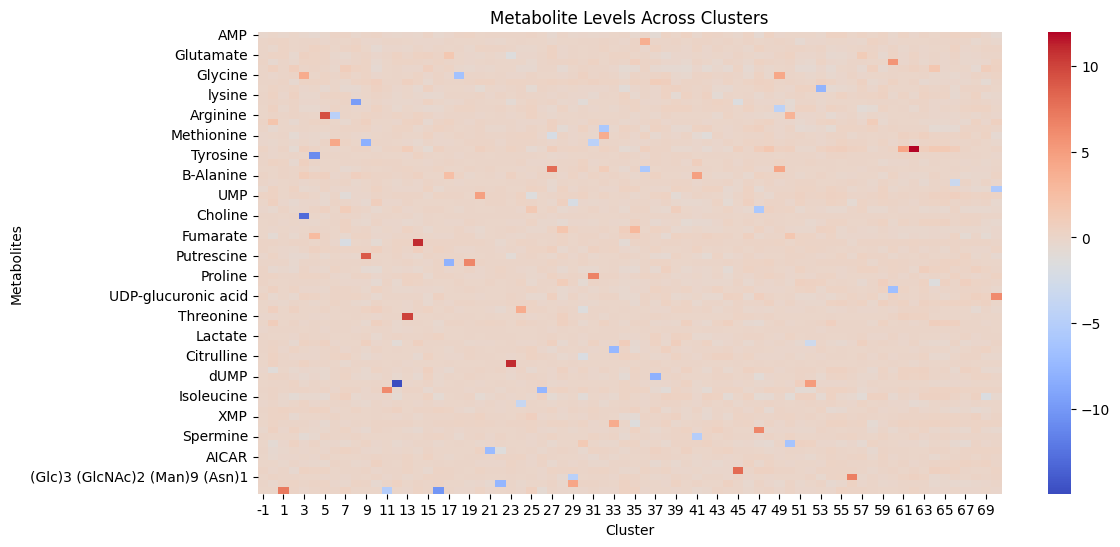

In [ ]:


plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, cmap='coolwarm', annot=False)
plt.title("Metabolite Levels Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Metabolites")
plt.show()


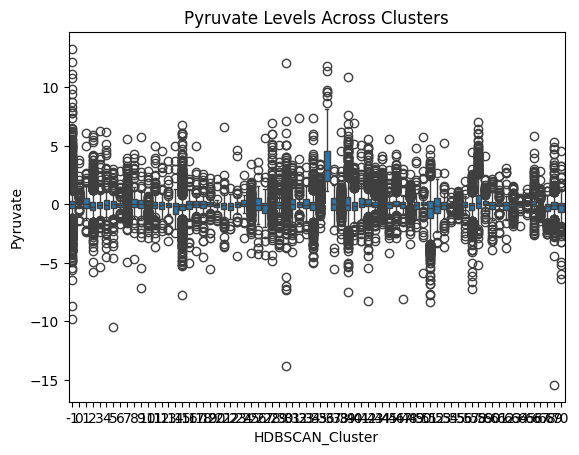

In [ ]:
sns.boxplot(x=df_umap_scaled['HDBSCAN_Cluster'], y=df_umap_scaled['Pyruvate'])
plt.title("Pyruvate Levels Across Clusters")
plt.show()

In [ ]:
# Define metabolites for Cluster 0
cluster_0_hmdb_ids = [
    "HMDB0000058", "HMDB0000207", "HMDB0000067", "HMDB0000221",
    "HMDB0001036", "HMDB0001334", "HMDB0000094", "HMDB0000108",
    "HMDB0000125", "HMDB0000286"
]

# Test with BioCarta pathway gene set
enrichment_results = gp.enrichr(
    gene_list=cluster_0_hmdb_ids,
    gene_sets="BioCarta_2016",  # Another pathway database
    organism="human"
)

# Convert results to DataFrame and display
enrichment_df = enrichment_results.results
print(enrichment_df[['Term', 'P-value', 'Adjusted P-value', 'Overlap']].head(10))


Empty DataFrame
Columns: [Term, P-value, Adjusted P-value, Overlap]
Index: []


In [ ]:


# Example: Pathway enrichment for a list of metabolites (e.g., cluster_0_hmdb_ids)
cluster_0_hmdb_ids = ['HMDB0000058', 'HMDB0000134', 'HMDB0000332']

# Try enrichment with a different library set
enrichment_results = gp.enrichr(
    gene_list=cluster_0_hmdb_ids,
    gene_sets="WikiPathways_2016  ",  # Try KEGG for metabolic pathways
    organism="human"
)

# Display top pathways
enrichment_df = enrichment_results.results
print(enrichment_df[['Term', 'P-value', 'Adjusted P-value', 'Overlap']].head(10))


NameError: name 'gp' is not defined

In [ ]:
# Define PubChem IDs for metabolites in Cluster 0 as strings
cluster_0_pubchem_ids = [
    '5004',  # Glutamine
    '1147',  # Pyruvate
    '22290', # Cholesterol
    # Add other metabolites' PubChem IDs here...
]

# Ensure all PubChem IDs are in string format to avoid 'isupper' issue
cluster_0_pubchem_ids = [str(id).strip() for id in cluster_0_pubchem_ids]

# Check the format of the IDs
print(cluster_0_pubchem_ids)

# Perform enrichment analysis with PubChem IDs
try:
    enrichment_results = gp.enrichr(
        gene_list=cluster_0_pubchem_ids,
        gene_sets="SMPDB",  # Pathway database
        organism="human"
    )

    # Convert results to a DataFrame
    enrichment_df = enrichment_results.results

    # Display the top results
    print(enrichment_df[['Term', 'P-value', 'Adjusted P-value', 'Overlap']].head(10))
except Exception as e:
    print(f"An error occurred: {e}")


['5004', '1147', '22290']
An error occurred: 'int' object has no attribute 'isupper'


In [ ]:

def perform_enrichment_for_cluster(metabolites, cluster_num, gene_set='KEGG_2016'):
    """
    Performs pathway enrichment analysis for a given set of metabolites.

    Parameters:
      metabolites (list): List of top metabolites for the cluster.
      cluster_num (int or str): Cluster label.
      gene_set (str): The gene set library to use for enrichment (default: 'KEGG_2016').

    Returns:
      DataFrame: Enrichment results.
    """
    # Run enrichment analysis
    enrich_result = gp.enrichr(
        gene_list=metabolites,
        gene_sets=gene_set,
        organism='human',  # Change to the relevant organism if necessary
        outdir=None  # Set to None to avoid unnecessary output folders
    )

    # Return the resulting DataFrame with selected columns
    return enrich_result.results[['Term', 'P-value', 'Adjusted P-value', 'Overlap']]

# Define metabolites for Cluster 0
cluster_0_metabolites = [
    "Glutamine", "3PD", "Cholesterol", "Oxaloacetate",
    "Dolichyl phosphate", "dCDP", "Citrate", "GABA",
    "Glutathione", "UMP"
]

# Run enrichment analysis
cluster_0_results = perform_enrichment_for_cluster(cluster_0_metabolites, cluster_num=0, gene_set='KEGG_2016')

# Display the top results
print("Pathway Enrichment Analysis for Cluster 0:")
print(cluster_0_results.head(10))


Pathway Enrichment Analysis for Cluster 0:
Empty DataFrame
Columns: [Term, P-value, Adjusted P-value, Overlap]
Index: []


In [ ]:
cluster_0_metabolites = [
    "Glutamine", "3PD", "Cholesterol", "Oxaloacetate",
    "Dolichyl phosphate", "dCDP", "Citrate", "GABA",
    "Glutathione", "UMP"
]


In [ ]:
cluster_0_results = perform_enrichment_for_cluster(cluster_0_metabolites, cluster_num=0, gene_set='KEGG_2016')

# Display the top results
print("Pathway Enrichment Analysis for Cluster 0:")
print(cluster_0_results.head(10))


TypeError: enrichr() got an unexpected keyword argument 'description'